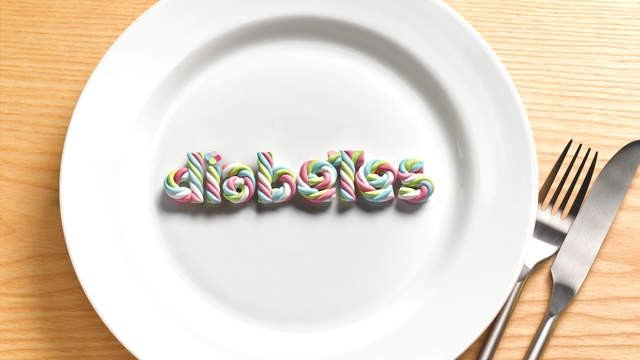

# PIMA INDIAN DIABETES CLASSIFICATION AND PREDICTION


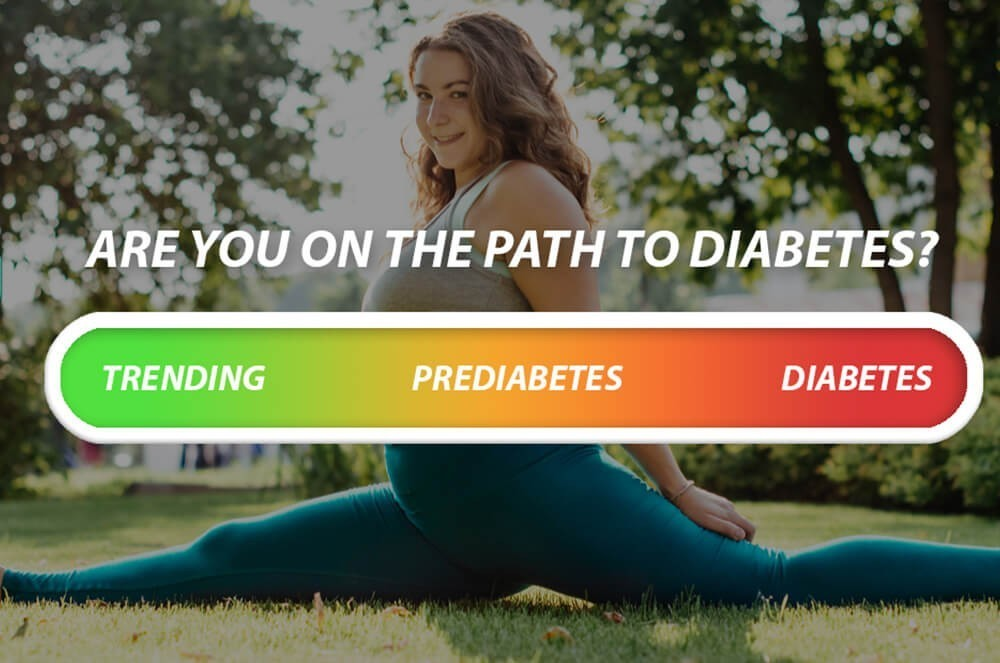

#### DESCRIPTION :

Diabetes is a chronic condition in which the body develops a resistance to insulin, a hormone which converts food into glucose. Diabetes affect many people worldwide and is normally divided into Type 1 and Type 2 diabetes. Both have different characteristics. In the case study we intend to analyze the PIMA Indian Diabetes dataset to predict if a particular observation is at a risk of developing diabetes, given the independent factors. 

#### Dataset :
The dataset can be found on the Kaggle website. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases and can be used to predict whether a patient has diabetes based on certain diagnostic factors. Starting off, 


#### Attributes :

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)




# Project Goals

### PROBLEM STATEMENT - Predict whether a person has diabetes or not.

#### Subproblems -

  Is the stimulus for insulin secretion the increasing amount of glucose ?
  What is the pregnancy rate in the women ?
  Are pregnant women more prone to diabetes?
  Show the BMI distribution for particular age group as per the outcome rate of diabetes.
  Find the Glucose level in group of pregnant women who had diabetes?
  How many pregnant women had BP?
  In which age group people should be more cautious as they can be  more prone to diabetes?
  Are more people  Diabetic or Non Diabetic ?
  Check the percentage of healthy and diabetic women?
  Try to plot a pairplot to see which paramaters might have a stronger correlation with either outcomes of diabetic patient and   non-diabetic patient
  .....

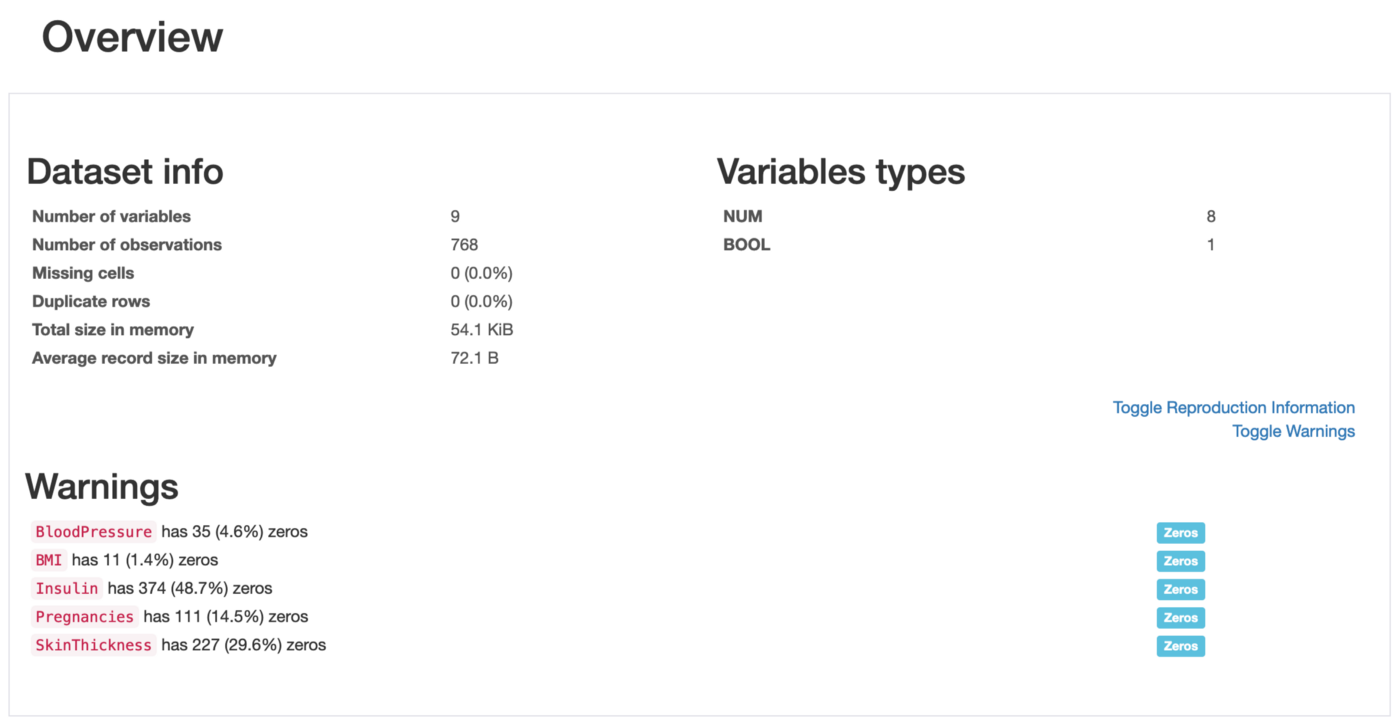

### INTERPRETATIONS :

###### The observations after the analysis and visualization are as follows :


In [1]:
from IPython.display import Image
Image(url= "abc.png")

# Importing Libraries

In [2]:
# Importing essential libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [3]:
# Loading the dataset

df = pd.read_csv('diabetes.csv')

# Exploring the dataset

In [4]:
#
type(df)

pandas.core.frame.DataFrame

In [5]:
# Returns number of rows and columns of the dataset
df.shape

(768, 9)

In [6]:
# Returns an object with all of the column headers 
df.columns

Index(['Pregnancies', 'Glucose*', 'BloodPressure', 'SkinThickness', 'Insulin*',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

Pregnancies  Glucose*  BloodPressure  SkinThickness  Insulin*   BMI  \
0            6       148             72             35         0  33.6   
1            1        85             66             29         0  26.6   
2            8       183             64              0         0  23.3   
3            1        89             66             23        94  28.1   
4            0       137             40             35       168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [9]:
df.columns = columns

In [10]:
df.head(n=5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [11]:
df.tail(n=5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [12]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
# Returns basic statistics on numeric columns
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [14]:
df.describe().transpose()

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [15]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [16]:
#Missing values
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Data Types

In [18]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Exploratory Data Analysis

### OUTCOME -

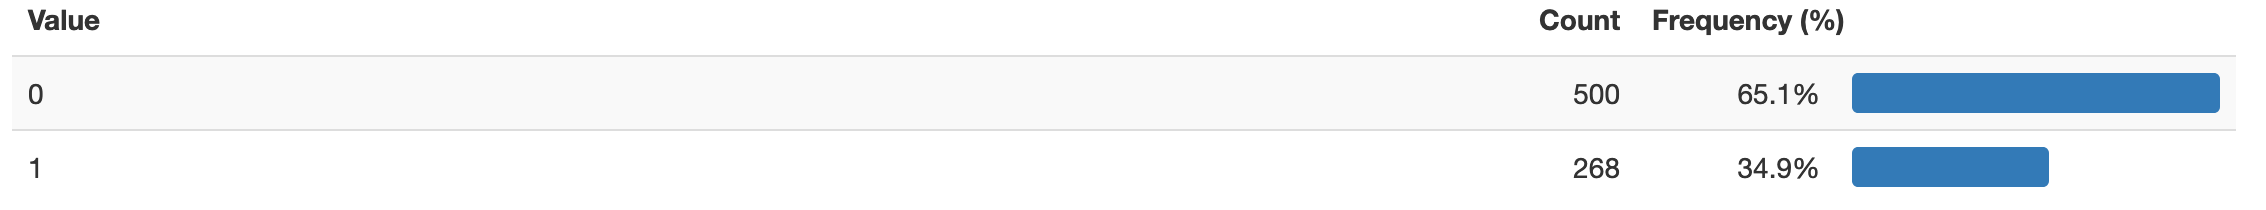

0    500
1    268
Name: Outcome, dtype: int64


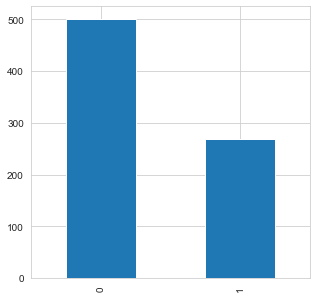

In [44]:
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind='bar',figsize=(5,5))  

OBSERVATION:

Our Dependent Variable ‘Outcome’ takes Boolean values 0 and 1. 0 indicates non-diabetic and 1 indicates diabetic. To examine the occurrence, we use a simple bar plot.
The imbalance in the data can be clearly seen with 0 (Non-Diabetic). We will treat this imbalance later in the process.

### AGE:-

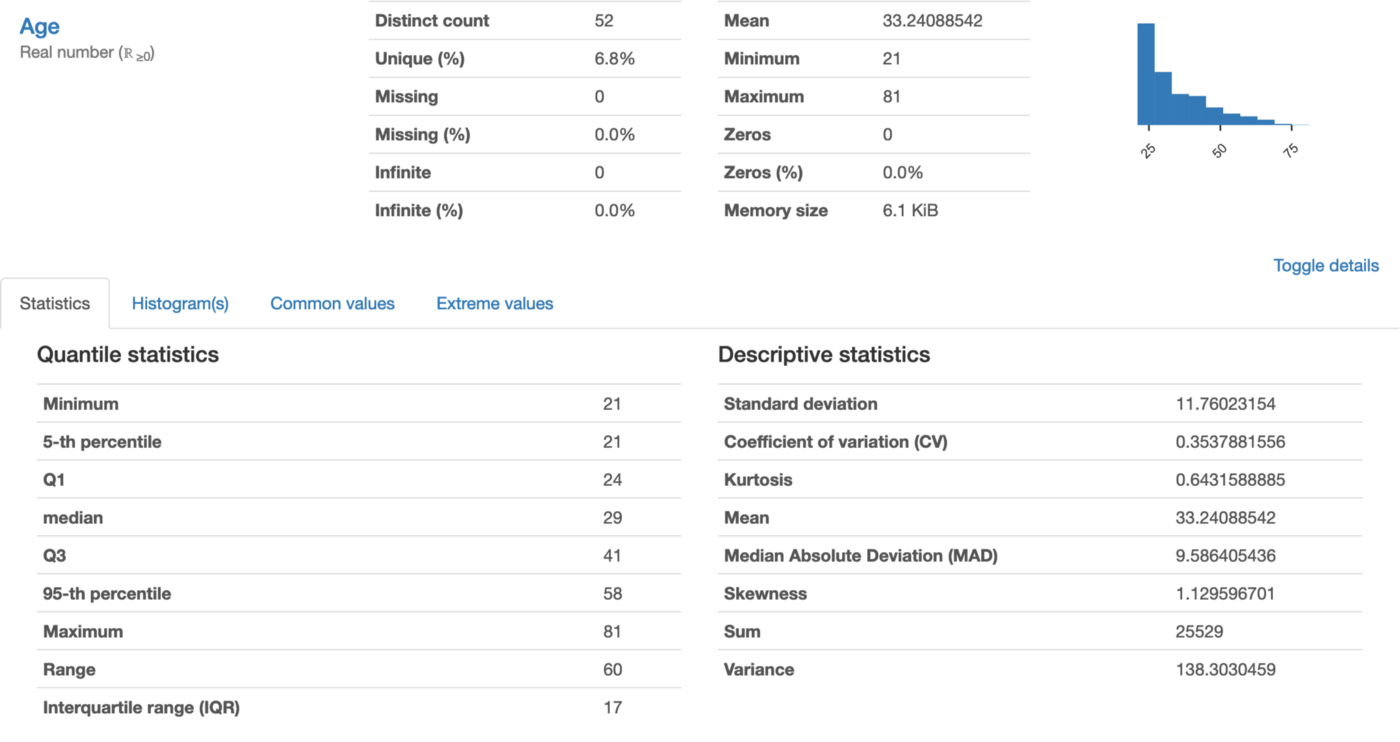

In [19]:
df['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

<AxesSubplot:>

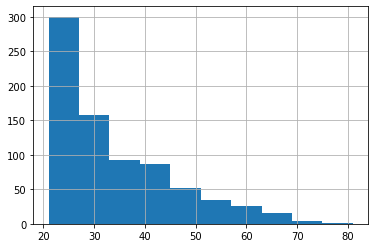

In [20]:
df['Age'].hist()

OBSERVATION :

This shows that the mean age of women around 33 with a minimum of 21 and maximum of 81 which seems quite obvious also which states that the data seems to have quite normal distribution.

### DIABETES PEDIGREE FUNCTION :-

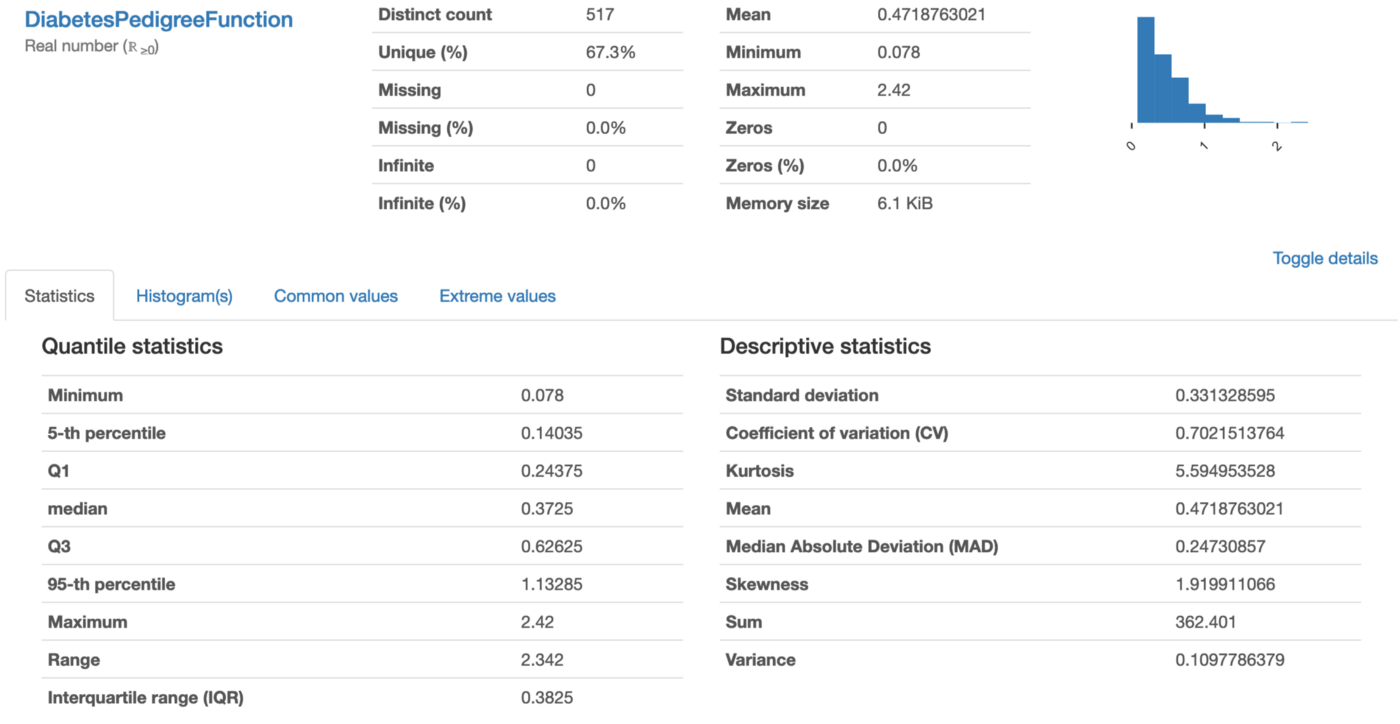

In [21]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            6      148             72             35        0  33.6  0.627   
1            1       85             66             29        0  26.6  0.351   
2            8      183             64              0        0  23.3  0.672   
3            1       89             66             23       94  28.1  0.167   
4            0      137             40             35      168  43.1  2.288   

   Age  Outcome  
0   50        1  
1   31        0  
2   32        1  
3   21        0  
4   33        1

<AxesSubplot:xlabel='Outcome', ylabel='DPF'>

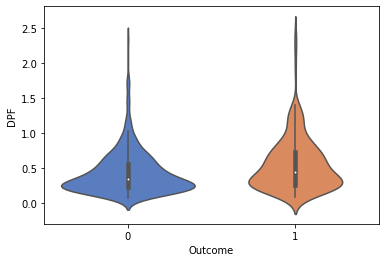

In [22]:
sns.violinplot(x="Outcome", y="DPF",data= df, palette="muted", split= True)

OBSERVATION :-

Diabetes Pedigree Function, provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. This measure of genetic influence gave us an idea of the hereditary risk one might have with the onset of diabetes mellitus.

Diabetics seem to have a higher pedigree function that the non-diabetics.


### BLOOD PRESSURE :-

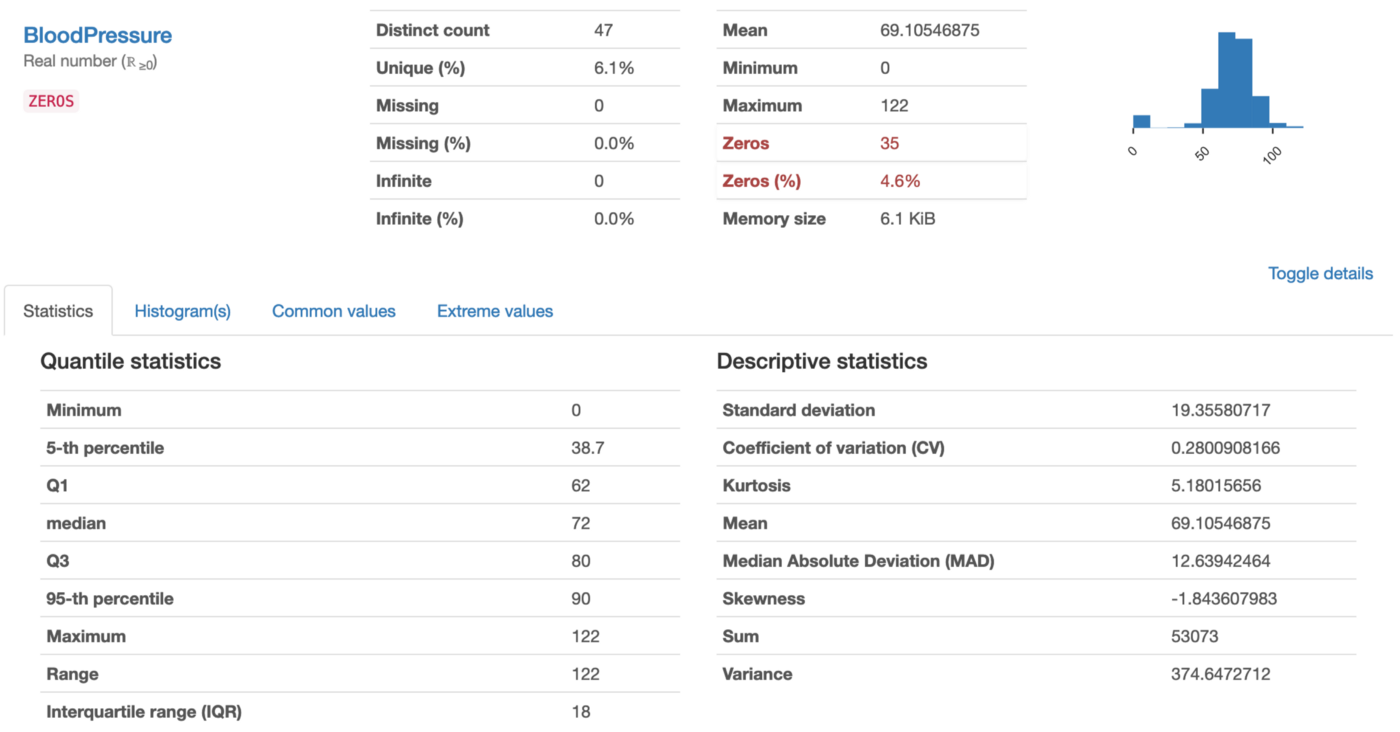

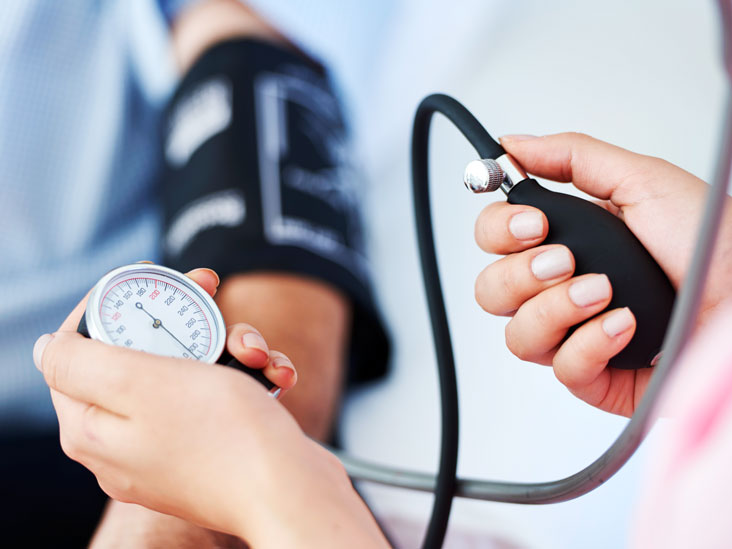

In [23]:
df['BloodPressure'].value_counts()

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
82     30
66     30
88     25
84     23
90     22
58     21
86     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
96      4
44      4
110     3
106     3
100     3
98      3
108     2
104     2
46      2
55      2
30      2
95      1
61      1
102     1
38      1
40      1
24      1
114     1
122     1
Name: BloodPressure, dtype: int64

In [24]:
df['BloodPressure'].min()

0

OBSERVATION:

The variable blood pressure has many null values i.e 35 people with 0 measure of BP but we know generally BP can't be zero for an individual.So this is not an attribute of normal hypothesis.

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

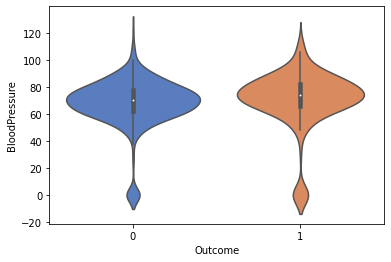

In [25]:
sns.violinplot(x="Outcome", y="BloodPressure",data= df, palette="muted", split= True)

In [26]:
#Replacing the zero-values for Blood Pressure

df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

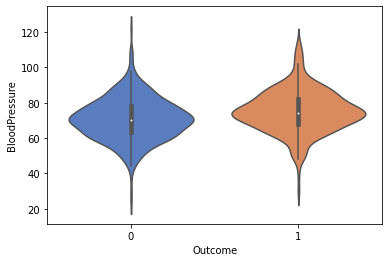

In [27]:
sns.violinplot(x="Outcome", y="BloodPressure",data= df, palette="muted", split= True)

OBSERVATION:

It is clearly visible that box plot for 1(Diabetic) inside the violin is little away from horizontal axis than the 0( Non - Diabetic) , which implies that diabetics seem to have higher blood pressure than non diabetics.
The bottom values indicate the zero values which need to be replaced. We replaced the zeros for 1 with median of 1 and vice versa and plotted the same violin plot agin to show the differences.

### BMI :-

The Body Mass Index (BMI) provides a simple, yet accurate method of assessing whether a patient is at risk of being over-or-underweight.It can easily be calculated by dividing the patient’s weight (kg) by the square of their height (meters).

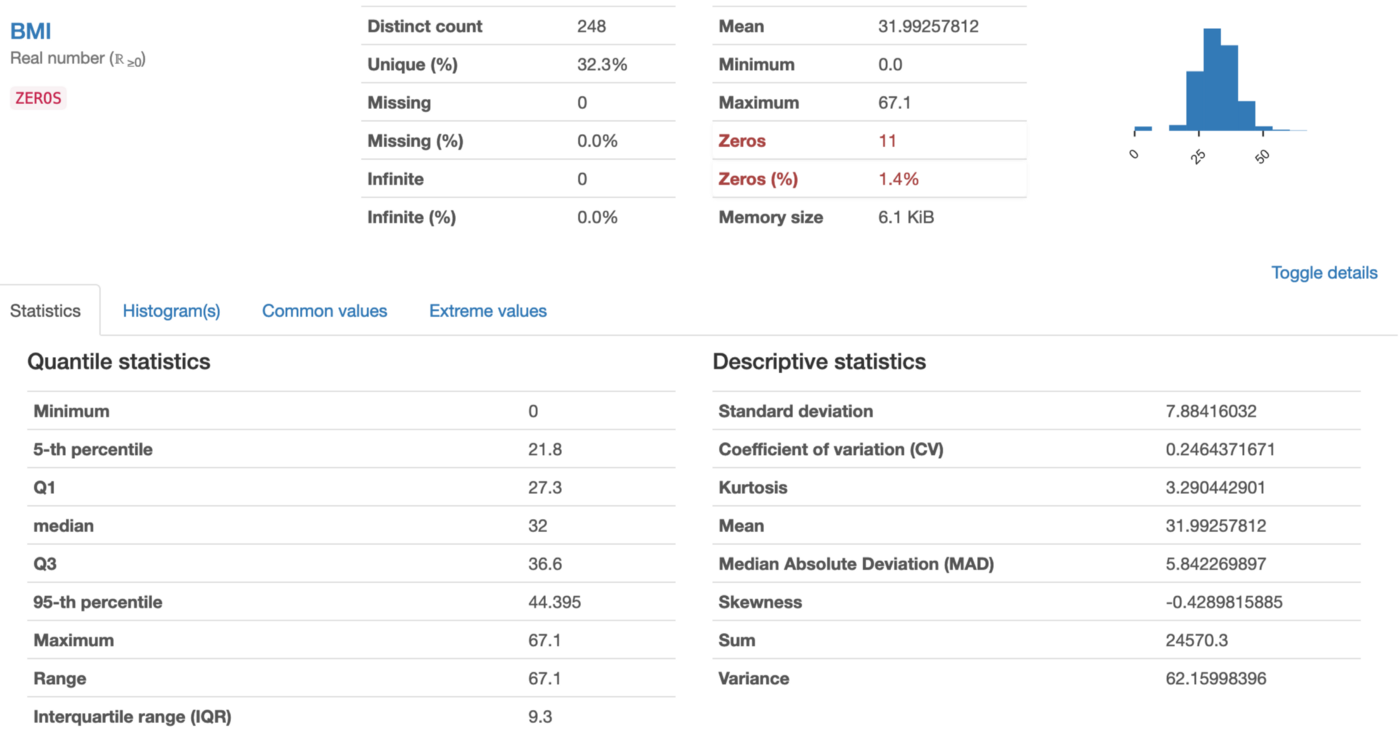

In [28]:
df['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
        ..
45.8     1
40.1     1
42.2     1
41.0     1
45.7     1
Name: BMI, Length: 248, dtype: int64

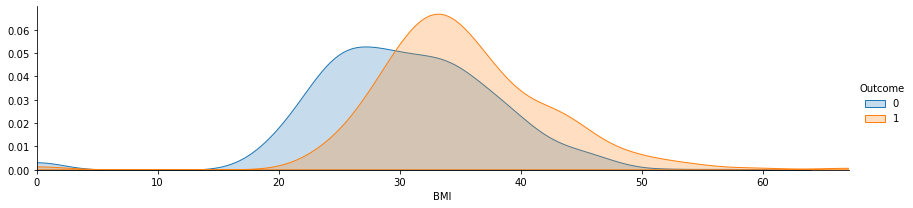

In [29]:
fig = sns.FacetGrid(df, hue="Outcome",aspect=4)
fig.map(sns.kdeplot,'BMI',shade= True)
oldest = df['BMI'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

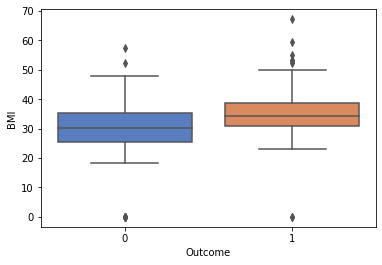

In [30]:
sns.boxplot(x="Outcome", y="BMI",data= df, palette="muted")

OBSERVATION:

The variable seems to be closely following the normal distribution as the mean and median are approximately equal. However, it faces the same problem as before, that is, the existence of zero-values. As shown by the box plot for this variable.

## INSULIN :-

Insulin is a hormone that helps move blood sugar, known as glucose, from your bloodstream into your cells.

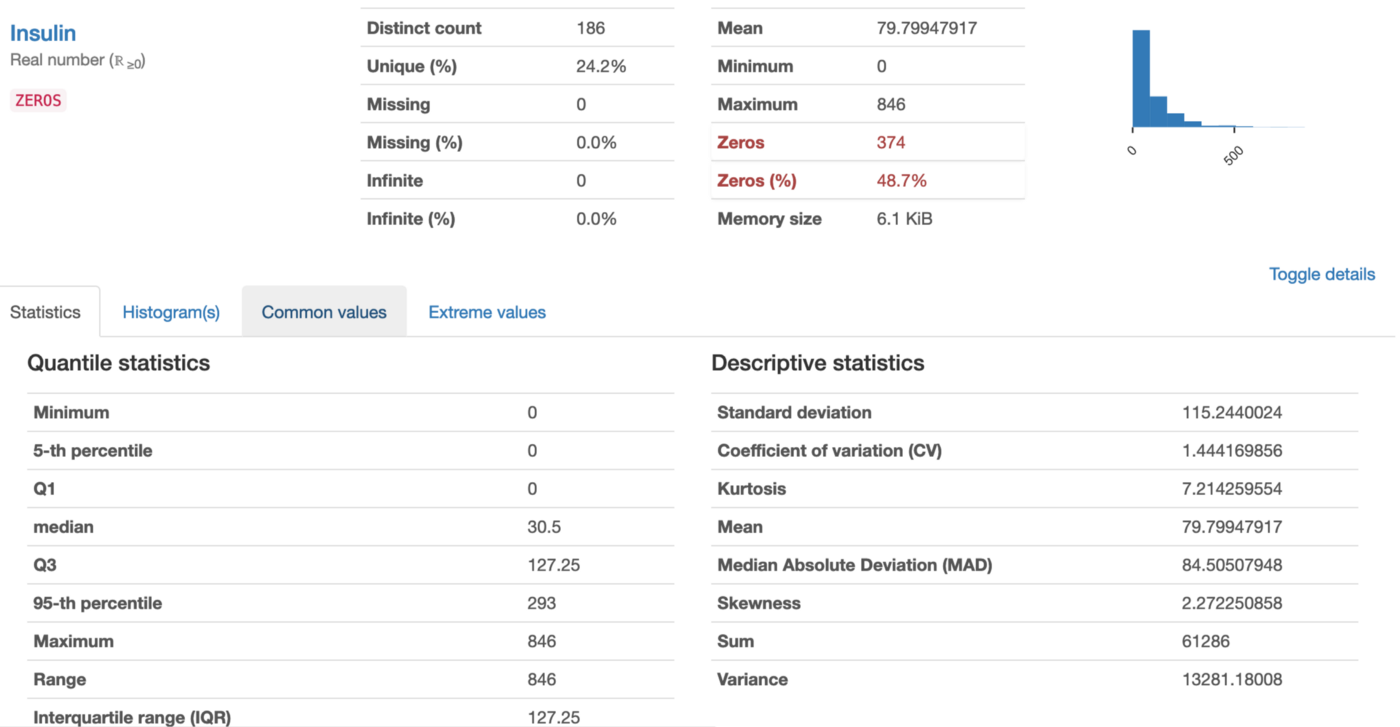

In [31]:
df['Insulin'].mean()

79.79947916666667

In [32]:
df['Insulin'].min()

0

In [33]:
df['Insulin'].max()

846

<AxesSubplot:>

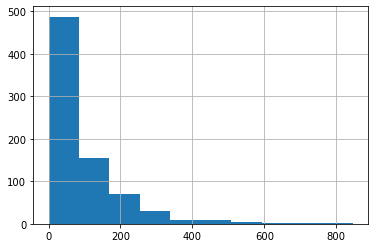

In [34]:
df['Insulin'].hist()

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

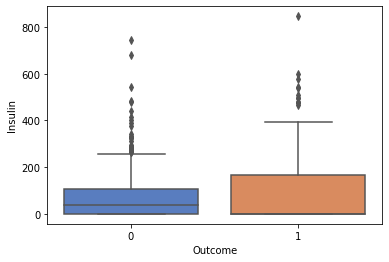

In [35]:
sns.boxplot(x="Outcome", y="Insulin",data= df, palette="muted")

OBSERVATION:

After treating the zero-values later, we will derive from the graph. We can still see 0 as the median for Insulin for Diabetics. However, for Non-Diabetics, Insulin is a little higher. It can be roughly hypothesized that Insulin for Diabetics is lower than Non-Diabetics.

## GLUCOSE :-

Blood glucose is the main source of energy and comes from the food you eat.

Sometimes it happens that the body doesn’t make enough — or any — insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells creating problems.

Oral Glucose Tolerance Test result:
The glucose tolerance test is a lab test to check how your body moves sugar from the blood into tissues like muscle and fat.
The test is often used to diagnose diabetes.

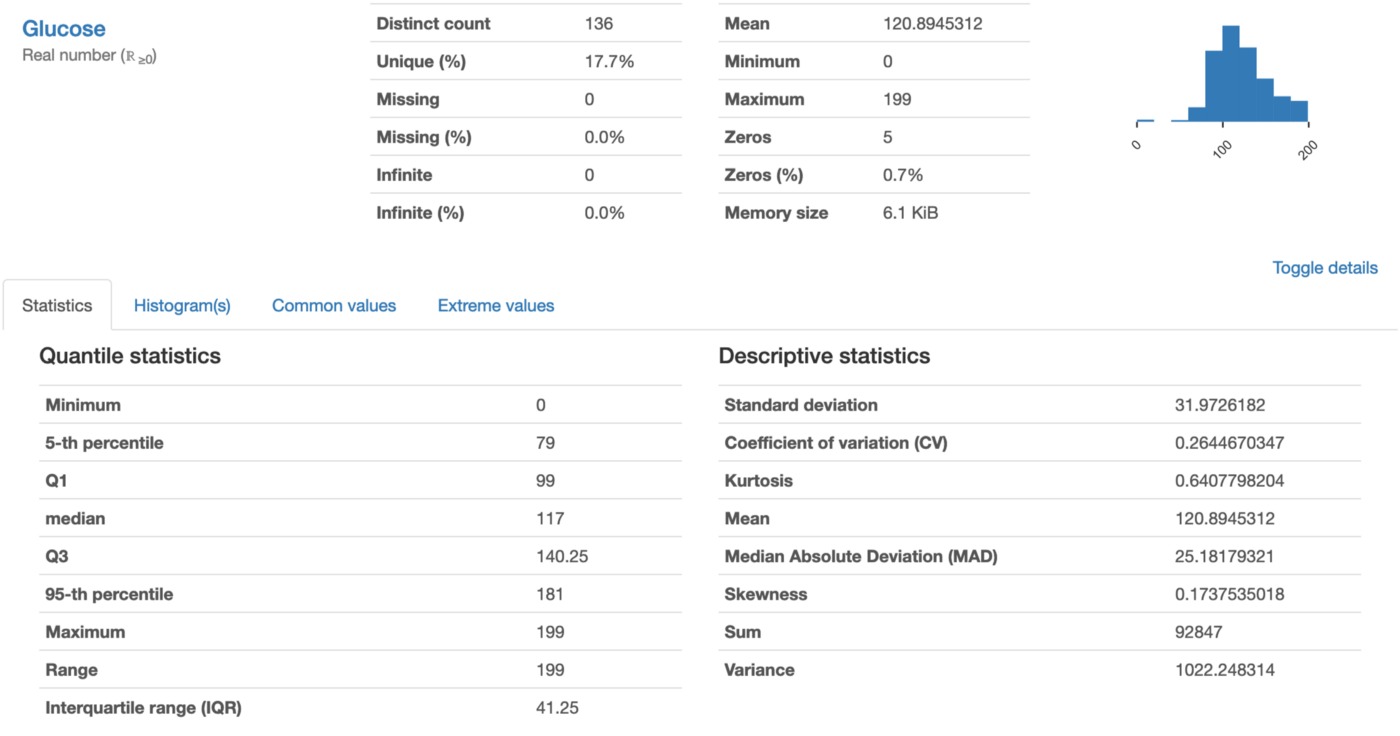

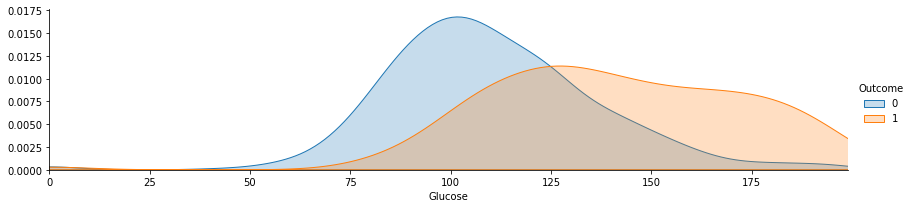

In [36]:
fig = sns.FacetGrid(df, hue="Outcome",aspect=4)
fig.map(sns.kdeplot,'Glucose',shade= True)
oldest = df['Glucose'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

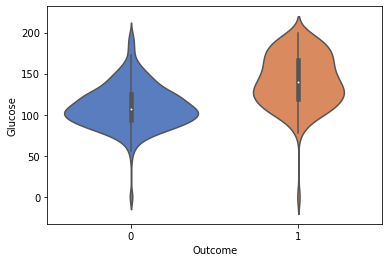

In [37]:
sns.violinplot(x="Outcome", y="Glucose",data= df, palette="muted", split= True)

OBSERVATION:

Observing the violin plot, we see a massive vertical distance between the box-plot for Diabetics and Non-Diabetics. This indicates that Glucose can be a very important variable in the study. 

## PREGNANCIES :-

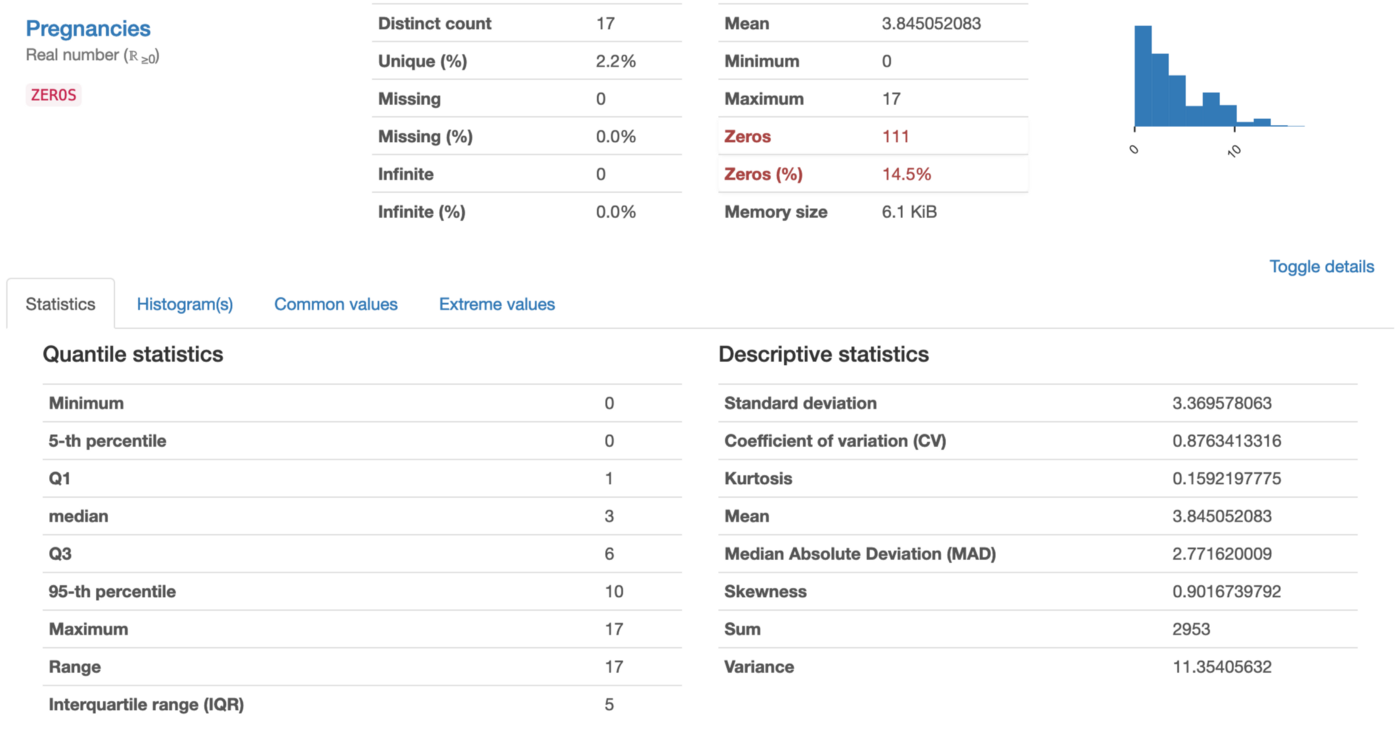

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

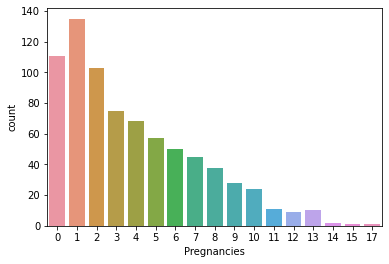

In [38]:
sns.countplot(df['Pregnancies'])

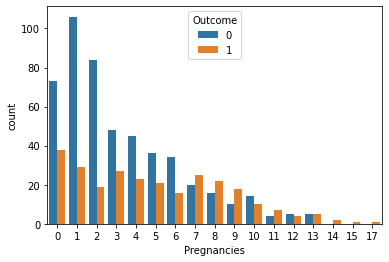

In [39]:
sns.countplot(x="Pregnancies",  hue='Outcome',  data=df);

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

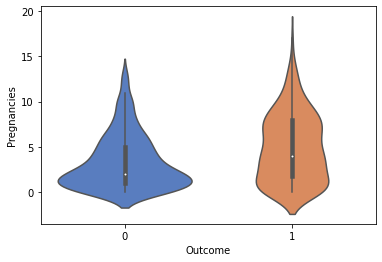

In [40]:
sns.violinplot(x="Outcome", y="Pregnancies",data= df, palette="muted", split= True)

OBSERVATION:

The variable is positively skewed with 14.5% zero values. We need not treat zero values as its not an abnormal occurrence. However, given the fact that 85.5% of the values is non-zero, we can infer that this study is done for females only. Looking at the behavior using violin plots we observe diabetic women had more pregnancies than non-diabetic.

## SKIN THICKNESS :-


Skinfold thickness, is a prediction of the total amount of body fat that can be made.
   
For adults, the standard normal values for triceps skinfolds are 2.5mm (men) or about 20% fat; 18.0mm (women) or about 30% fat.
Measurement half, or less, of these values represent about the 15th percentile and can be considered as either borderline, or fat depleted. 

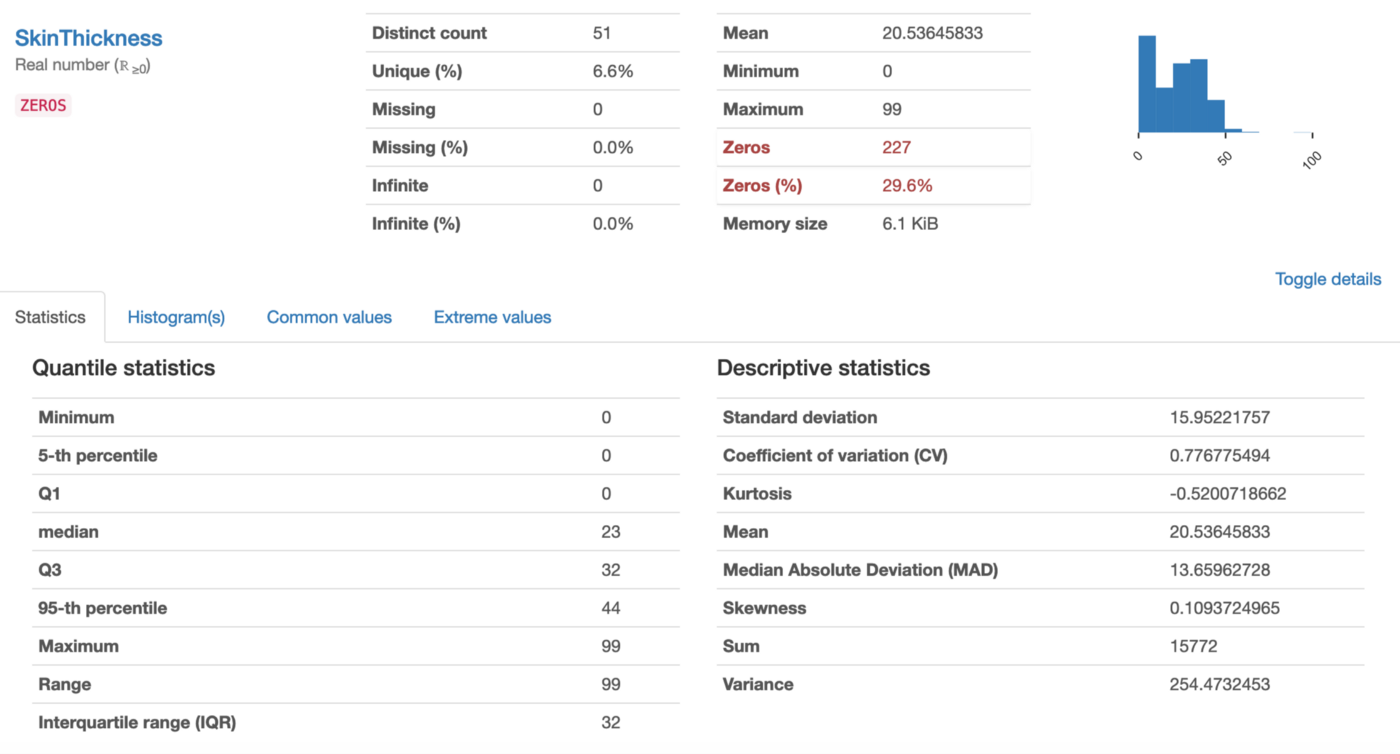

In [41]:
df['SkinThickness'].unique()

array([35,  0, 32, 45, 23, 19, 47, 30, 33, 26, 36, 37, 42, 24, 39, 34, 20,
       51, 25, 56, 14, 28, 44, 41, 18, 46, 13, 27, 29, 40, 22, 38, 21, 15,
        7, 17, 31, 48, 43, 49, 12, 63, 99, 11, 10, 60, 54, 50, 16, 52,  8],
      dtype=int64)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

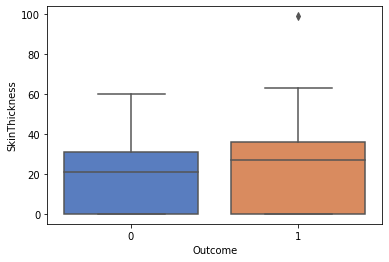

In [42]:
sns.boxplot(x="Outcome", y="SkinThickness",data= df, palette="muted")

OBSERVATION:

Skin Thickness for Diabetics is more than that of Non-Diabetics.

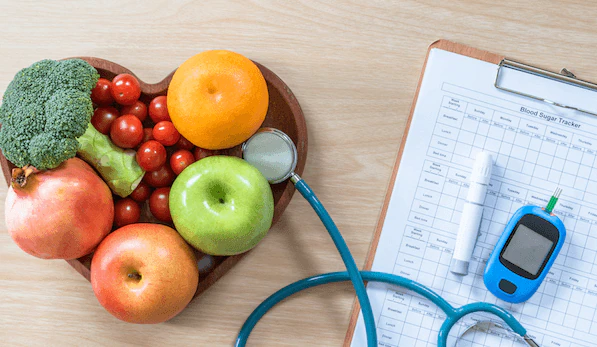

In [45]:
df.groupby(['Outcome']).agg({"Age":["mean", "median"],
                            "Glucose":["mean","median"],
                            "Pregnancies":["mean", "median"],
                            "BMI":["mean", "median"],
                            "SkinThickness":["mean", "median"]})

Age            Glucose        Pregnancies               BMI  \
              mean median        mean median        mean median       mean   
Outcome                                                                      
0        31.190000     27  109.980000    107    3.298000      2  30.304200   
1        37.067164     36  141.257463    140    4.865672      4  35.142537   

               SkinThickness         
        median          mean median  
Outcome                              
0        30.05     19.664000     21  
1        34.25     22.164179     27

### Unknown Diabetes Risk : What to do with missing or zero data values..?

# Data Cleaning

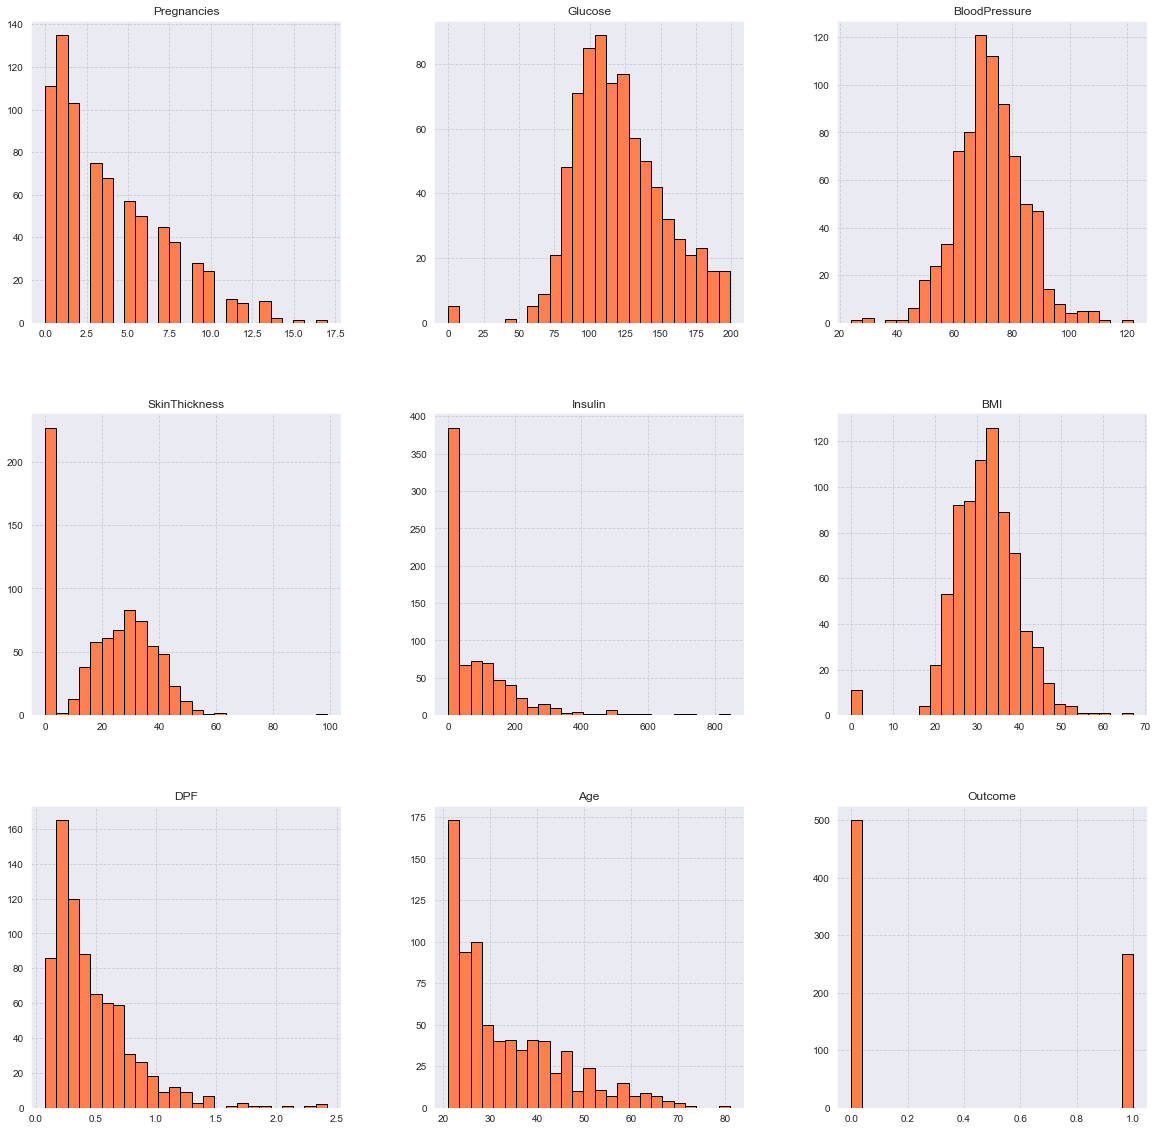

In [46]:
# To fill these Nan values the data distribution needs to be understood 
# Plotting histogram of dataset before replacing NaN values

sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
df.hist(figsize = (20,20),bins=25,color='#ff7f50',edgecolor="black")
plt.show()

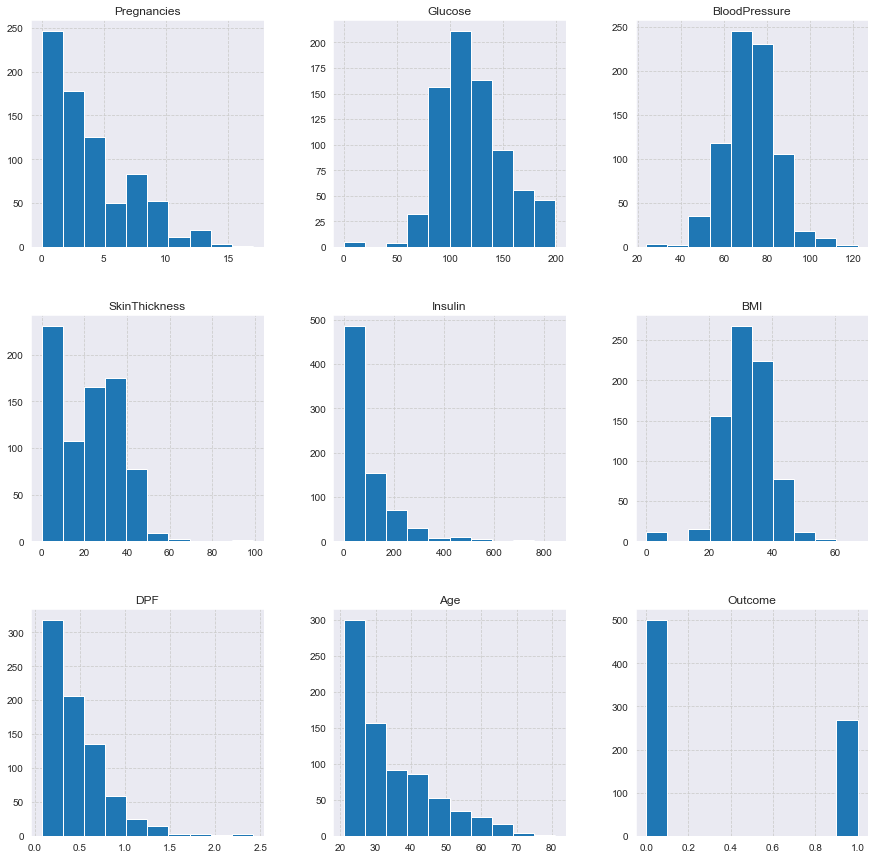

In [47]:
p = df.hist(figsize=(15,15))

In [48]:
for i in df.columns:
    print(i,len(df[df[i]==0]))

Pregnancies 111
Glucose 5
BloodPressure 0
SkinThickness 227
Insulin 374
BMI 11
DPF 0
Age 0
Outcome 500


In [49]:


cols_0 = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in cols_0:
    df[i].replace(0,df[i].mean(),inplace=True) 

In [50]:
# Replacing NaN value by mean, median depending upon distribution
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

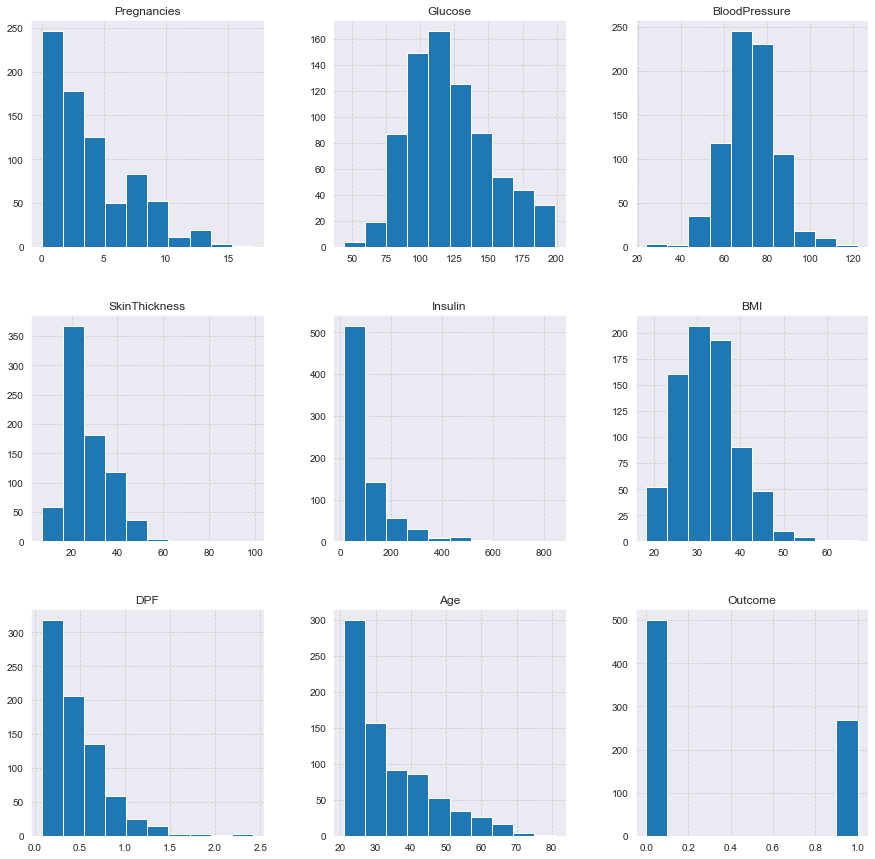

In [51]:
# Plotting histogram of dataset after replacing NaN values
p = df.hist(figsize=(15,15))

## PLOTTING

Finding Correlation among the variables

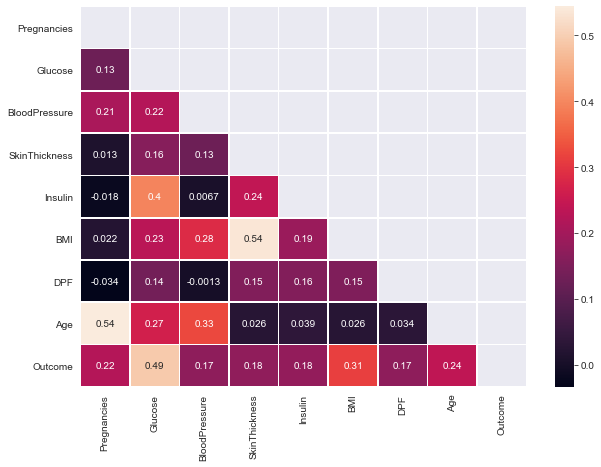

In [52]:
plt.figure(figsize=(10, 7))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

#### See the variables with respect to outcome variable

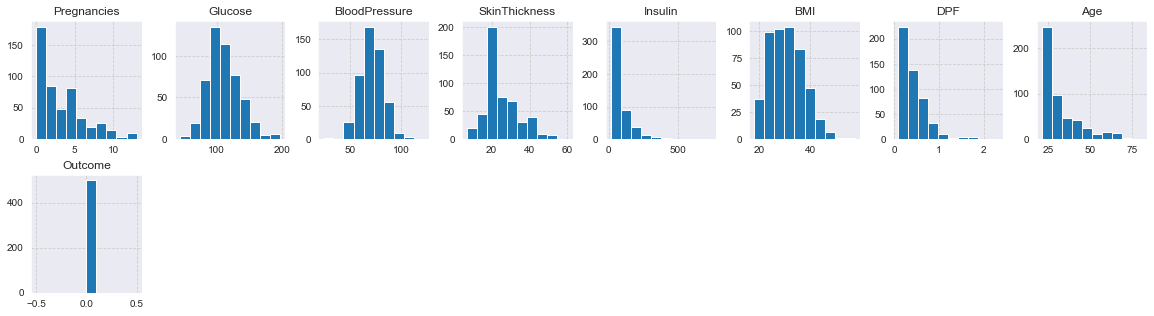

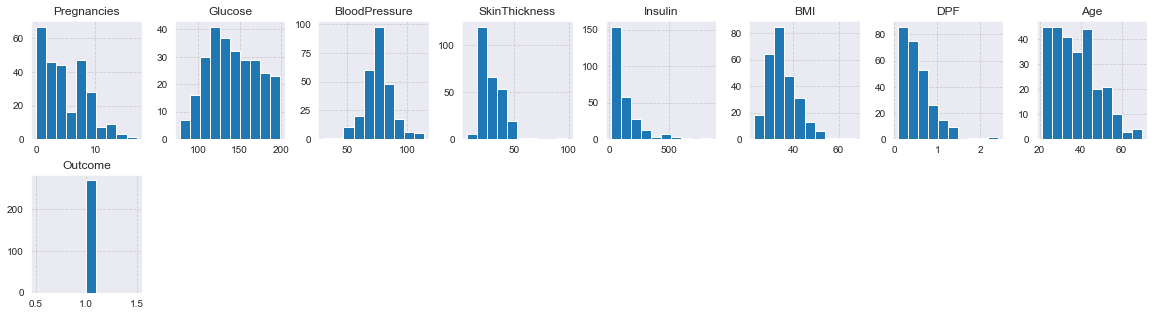

In [53]:
df.groupby('Outcome').hist(figsize=(20,5),layout=(2,8),histtype='barstacked')
plt.show() 

Pregnancies         AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose          AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness       AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI              AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DPF                    AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                 AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome             AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

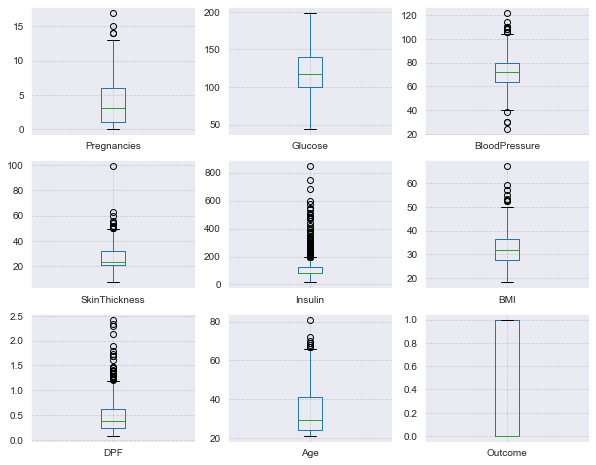

In [54]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

### Plotting Distribution for each Column in dataset

In [55]:
def distributionPlot(columnName):
    if not columnName == 'Outcome':
        plt.figure()
        ax = sns.distplot(df[columnName][df.Outcome == 1],
                        color="darkturquoise", rug=True)
        sns.distplot(df[columnName][df.Outcome == 0], color="lightcoral", rug=True);
        plt.legend(['Diabetes', 'No Diabetes']) 

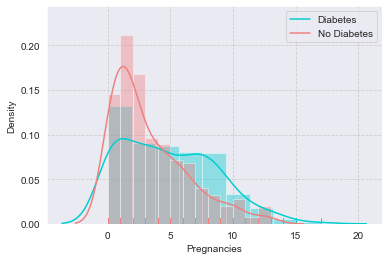

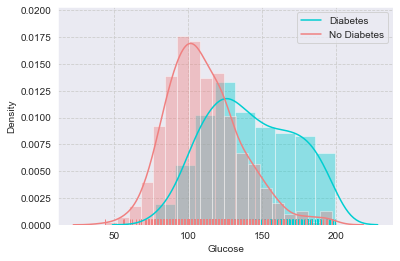

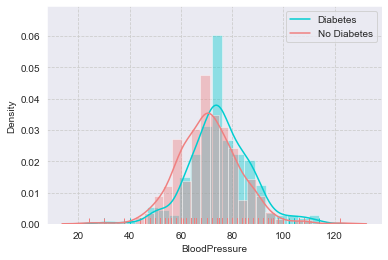

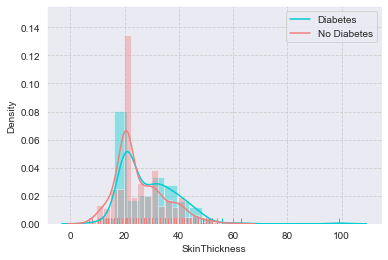

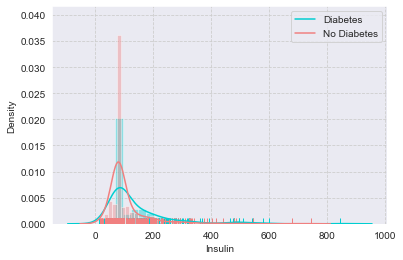

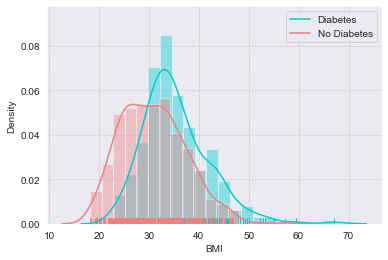

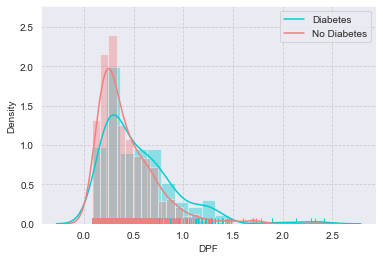

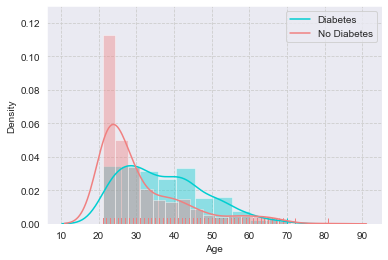

In [56]:
for column in df.columns:
    distributionPlot(column)

Plotting Pairplot

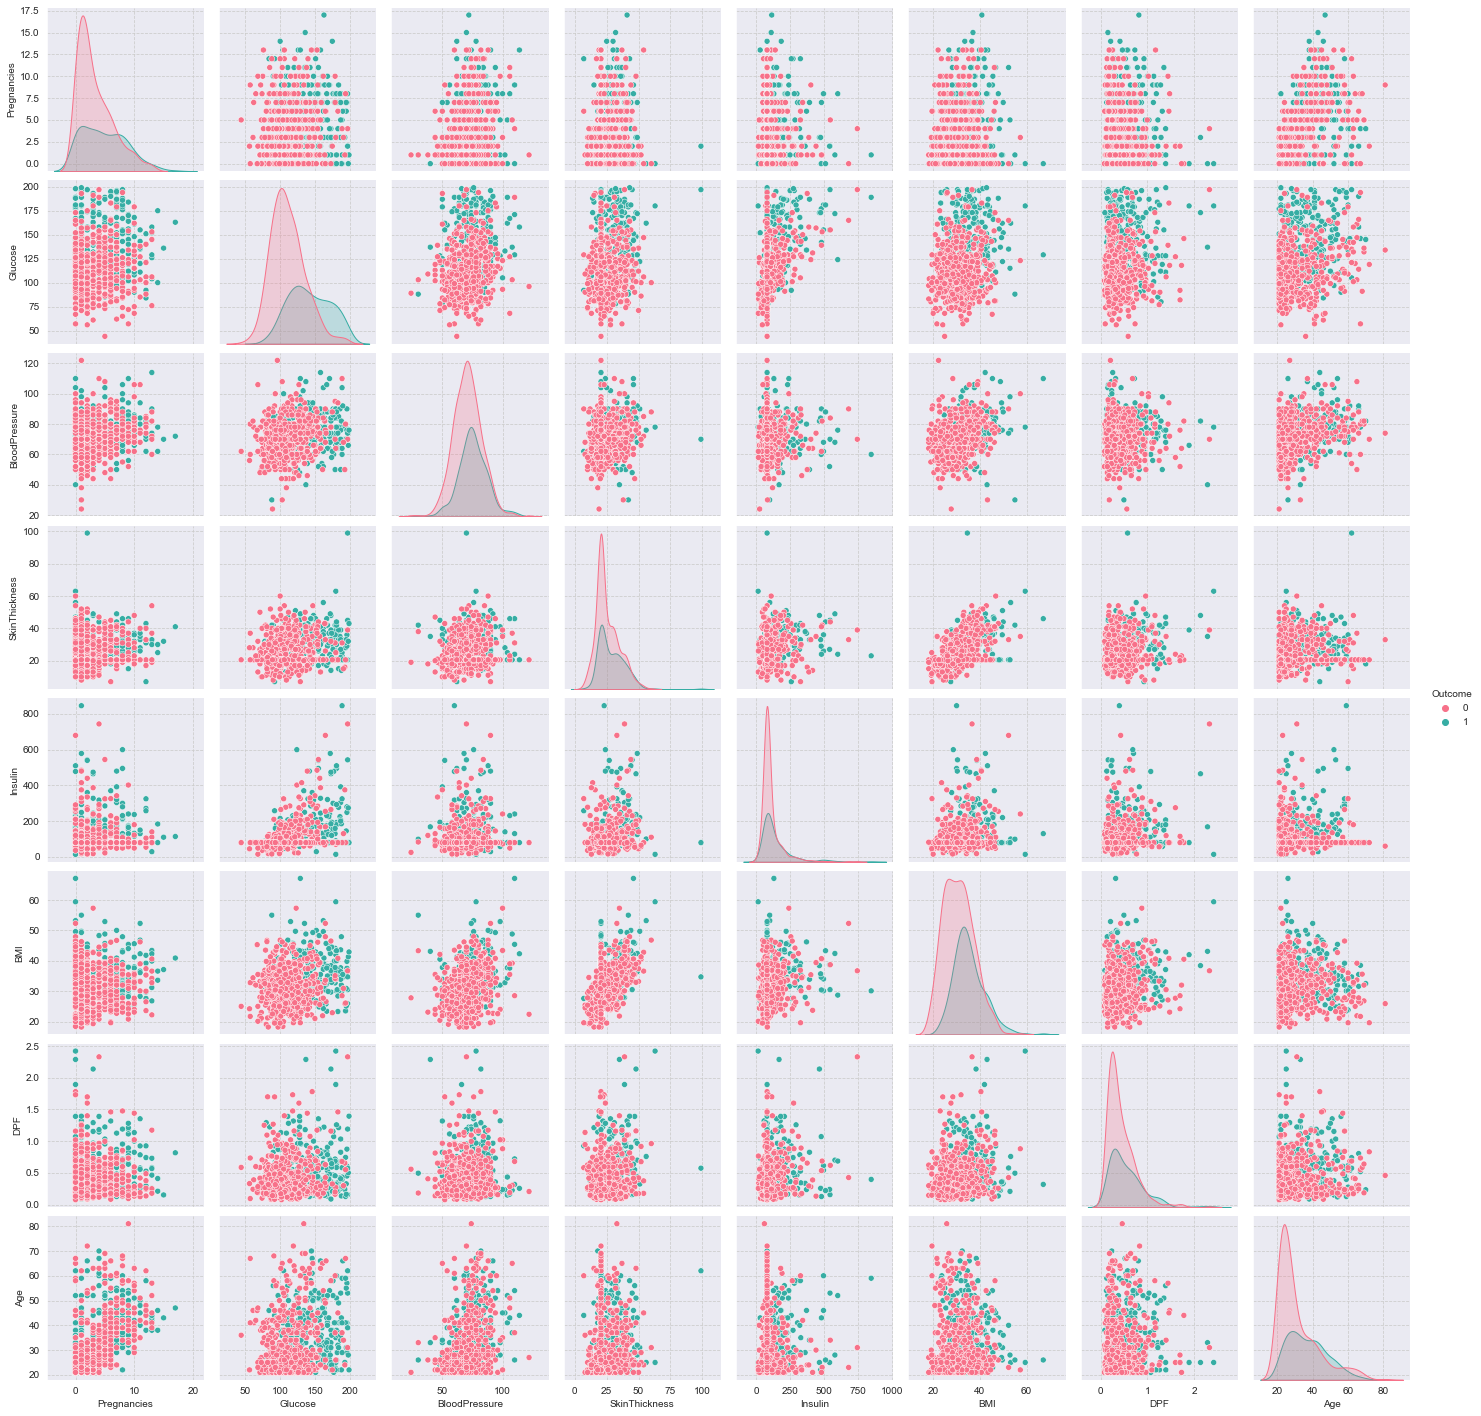

In [57]:
sns.pairplot(df, hue="Outcome", palette="husl");

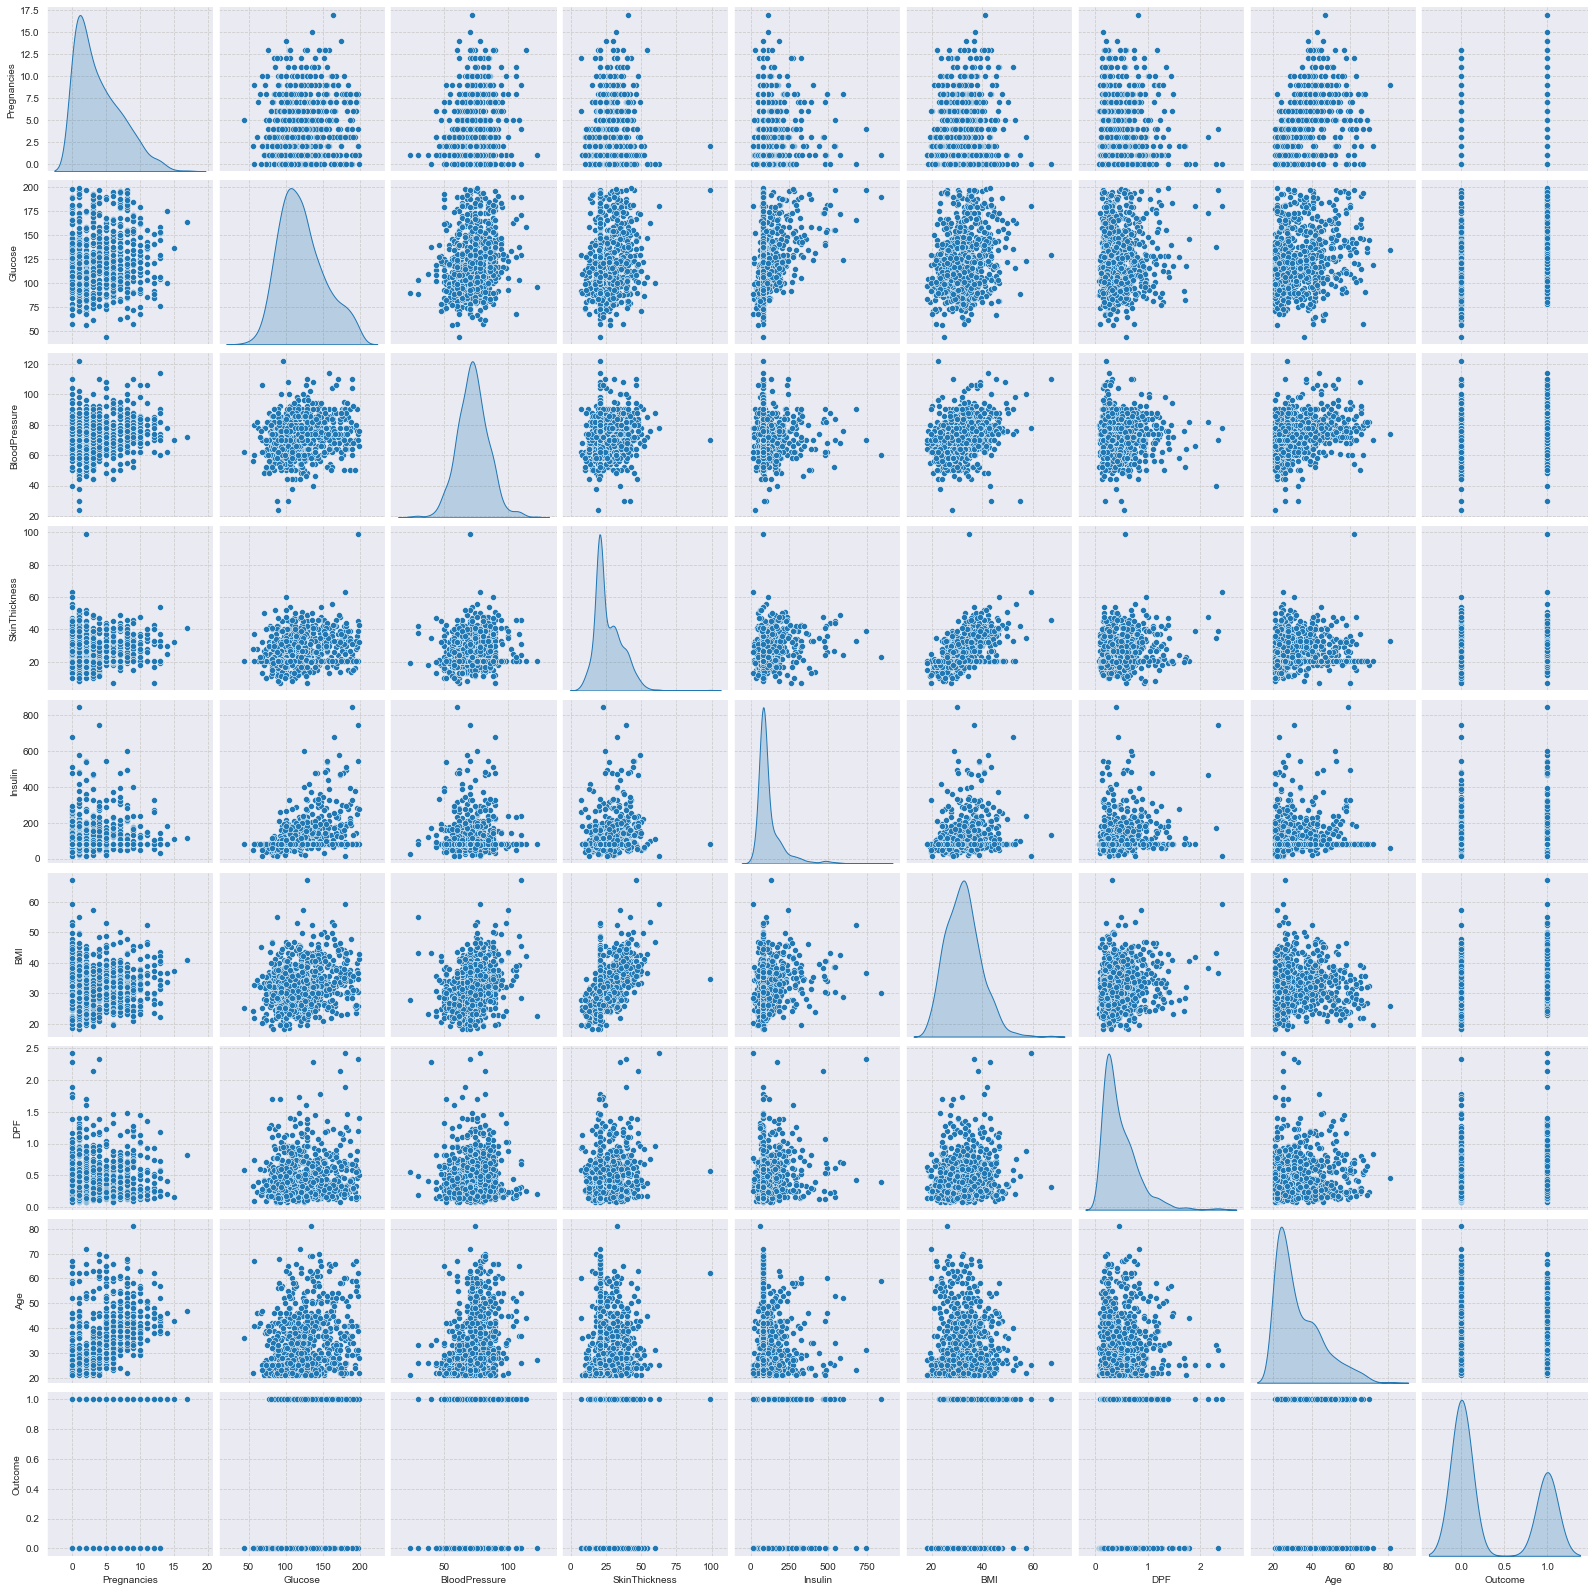

In [58]:
sns.pairplot(df,diag_kind='kde'); 

OBSERVATION:

From the kde plots, we can see that this confirms my histogram plot distribution, that most of the parameters are positively skewed, with outcome having a bimodal distribution, which is to be expected.
Glucose and BloodPressure are the only parameters which most resemble a normal distribution. 

## GRAPHIC VISUALIZATIONS :

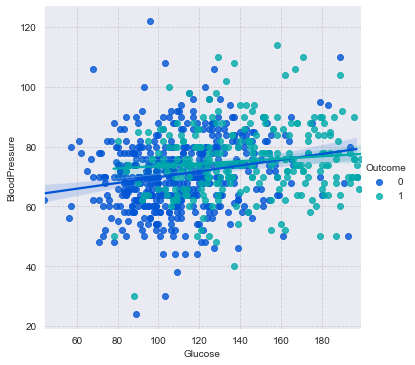

In [59]:
sns.lmplot(x='Glucose',y='BloodPressure',hue='Outcome',palette='winter',data=df)

OBSERVATION:Healthy persons are concentrate with an blood pressure <= 80 and glucose <= 105

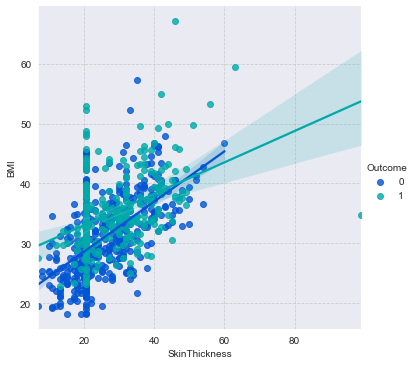

In [60]:
sns.lmplot(x='SkinThickness',y='BMI',hue='Outcome',palette='winter',data=df)

OBSERVATION:Healthy persons are concentrate with a BMI < 30 and skin thickness <= 20

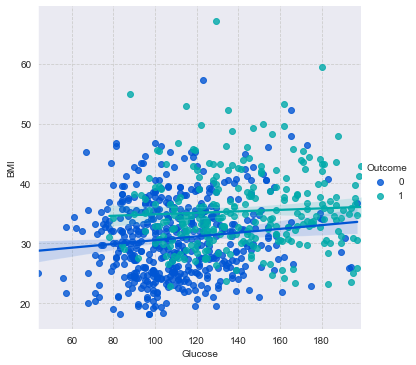

In [61]:
sns.lmplot(x='Glucose',y='BMI',hue='Outcome',palette='winter',data=df)

OBSERVATION: THE BMI OF A DIABETIC IS MUCH GREATER THAN THE NON DIABETIC FOR THE SAME GLUCOSE LEVEL

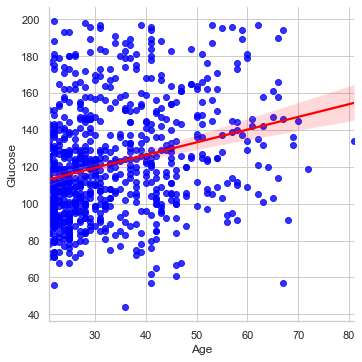

In [100]:
sns.lmplot(x='Age', y= 'Glucose',data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"}) 

OBSERVATION:The age and glucose levels are strongly correlated

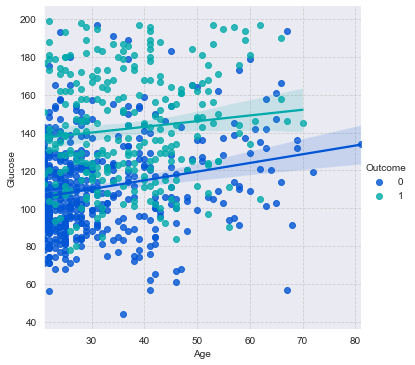

In [63]:
sns.lmplot(y='Glucose',x='Age',hue='Outcome',palette='winter',data=df)

OBSERVATION:for the same age the glucose levels of the diabetic is greater .

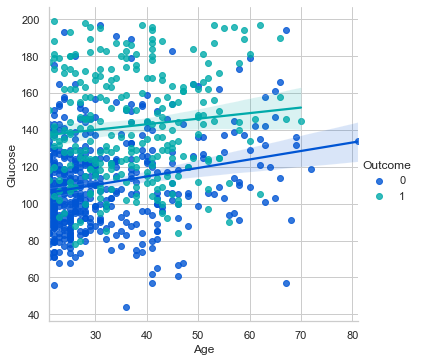

In [98]:
sns.lmplot(y='Glucose',x='Age',hue='Outcome',palette='winter',data=df)

### SUBPROBLEMS

### Is the stimulus for insulin secretion   is the increasing amount of glucose ?

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

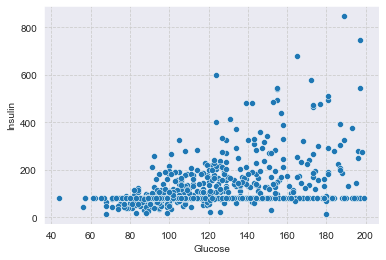

In [66]:
sns.scatterplot(x='Glucose', y= 'Insulin', data=df) 

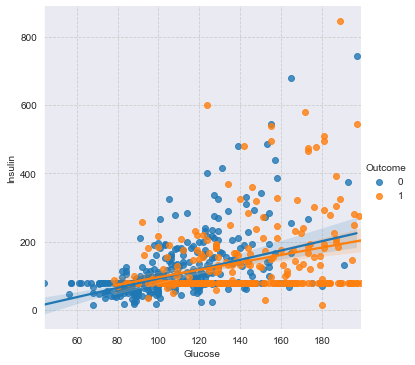

In [67]:
sns.lmplot(x='Glucose',y='Insulin',hue='Outcome',data=df)

OBSERVATION:-

Hence from the plots we can see insulin secretion from the beta cells of pancreas has its stimlus from the secretion of high blood glucose.

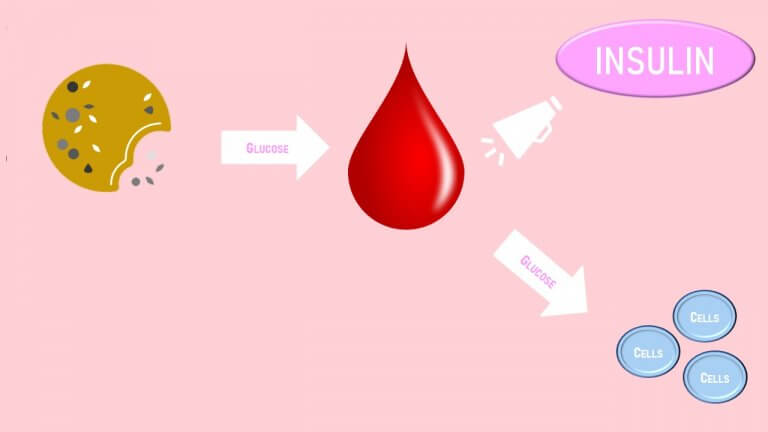

### # What is the pregnancy rate in the women ?

In [68]:
pregnancy_count = df["Pregnancies"].value_counts().reset_index()
pregnancy_count

index  Pregnancies
0       1          135
1       0          111
2       2          103
3       3           75
4       4           68
5       5           57
6       6           50
7       7           45
8       8           38
9       9           28
10     10           24
11     11           11
12     13           10
13     12            9
14     14            2
15     15            1
16     17            1

Type of Pregnancies with Count

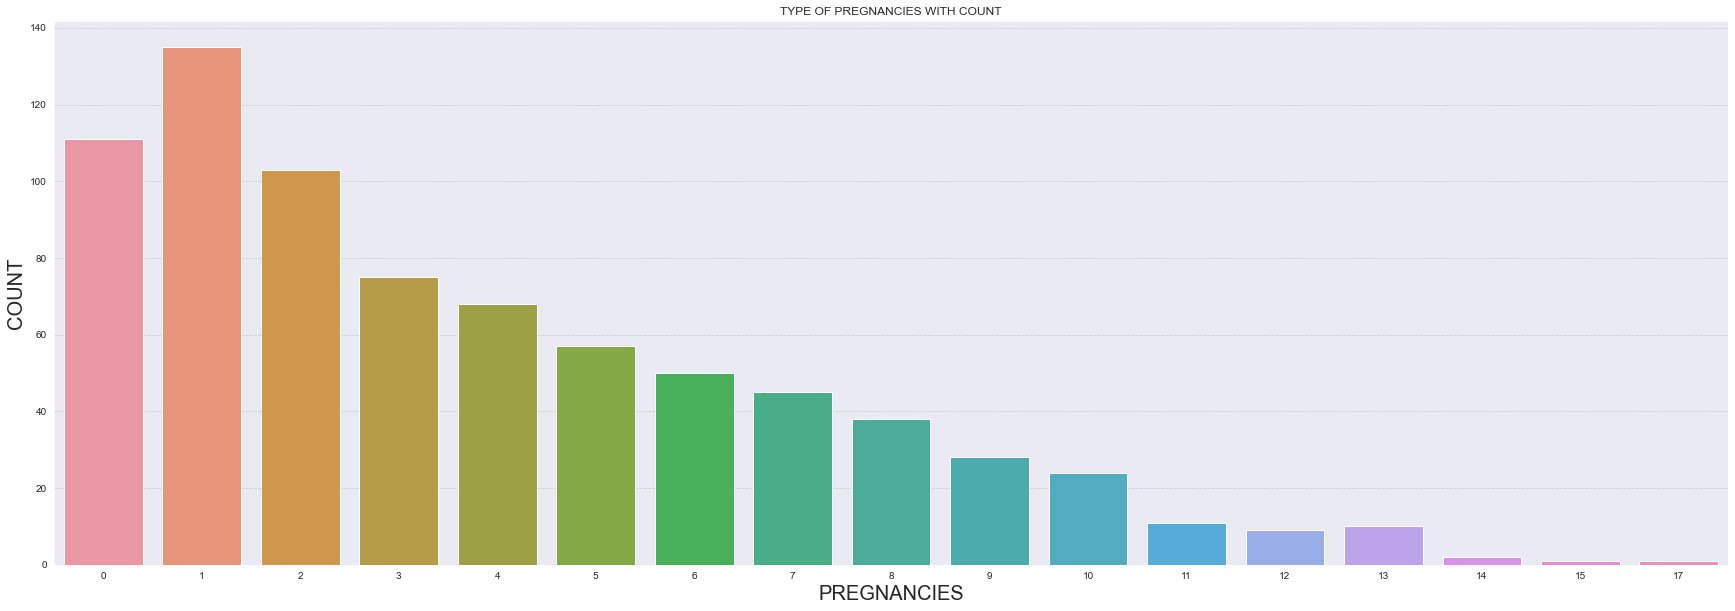

In [69]:
plt.figure(figsize=(30, 10))
sns.barplot(x=pregnancy_count["index"], y=pregnancy_count["Pregnancies"]);
plt.title("TYPE OF PREGNANCIES WITH COUNT")
plt.xlabel("PREGNANCIES", fontsize=20)
plt.ylabel("COUNT", fontsize=20)
plt.show()

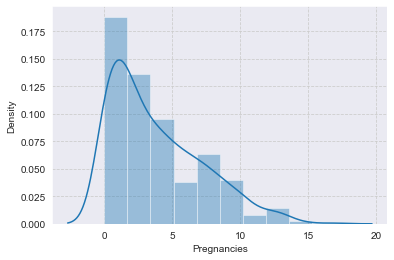

In [70]:
sns.distplot(df['Pregnancies'],bins=10); 

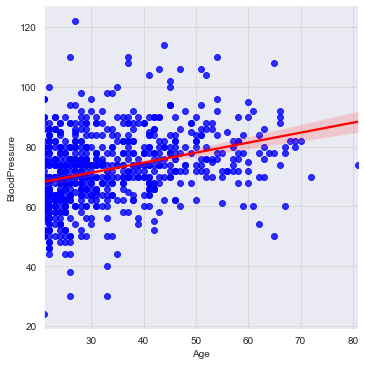

In [71]:
#does blood pressure increases with the age ??
sns.lmplot(x='Age', y= 'BloodPressure',data=df,  scatter_kws={"color": "blue"}, line_kws={"color": "red"}) 

OBSERVATION: With the age the BP increases

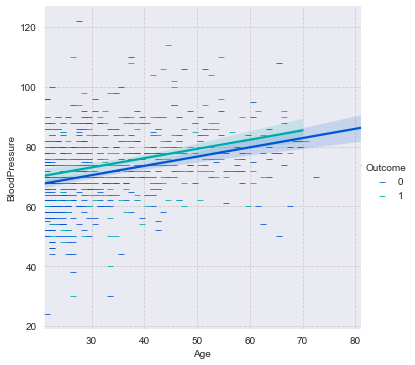

In [72]:
#what is the relation between the bloodpressure and age of the diabetic and non-diabetic people
sns.lmplot(y='BloodPressure',x='Age',hue='Outcome',markers=True,palette='winter',data=df)

OBSERVATION:For the same age the BP of the diabetic person is more than the non diabetic one

###  Are pregnant women more prone to diabetes?


In [2]:
sns.countplot(x="Pregnancies",hue='Outcome',data=df)

NameError: name 'sns' is not defined

OBSERVATION : 
we can observe that more pregnancies can be highly associated with higher chances of getting diabetic.
    

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

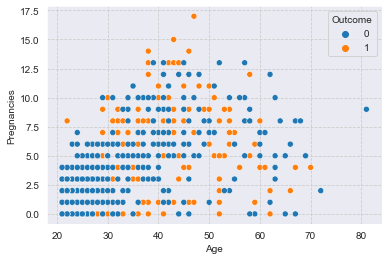

In [74]:
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=df)

There's a high chance of development of diabetes over the age of 40 .

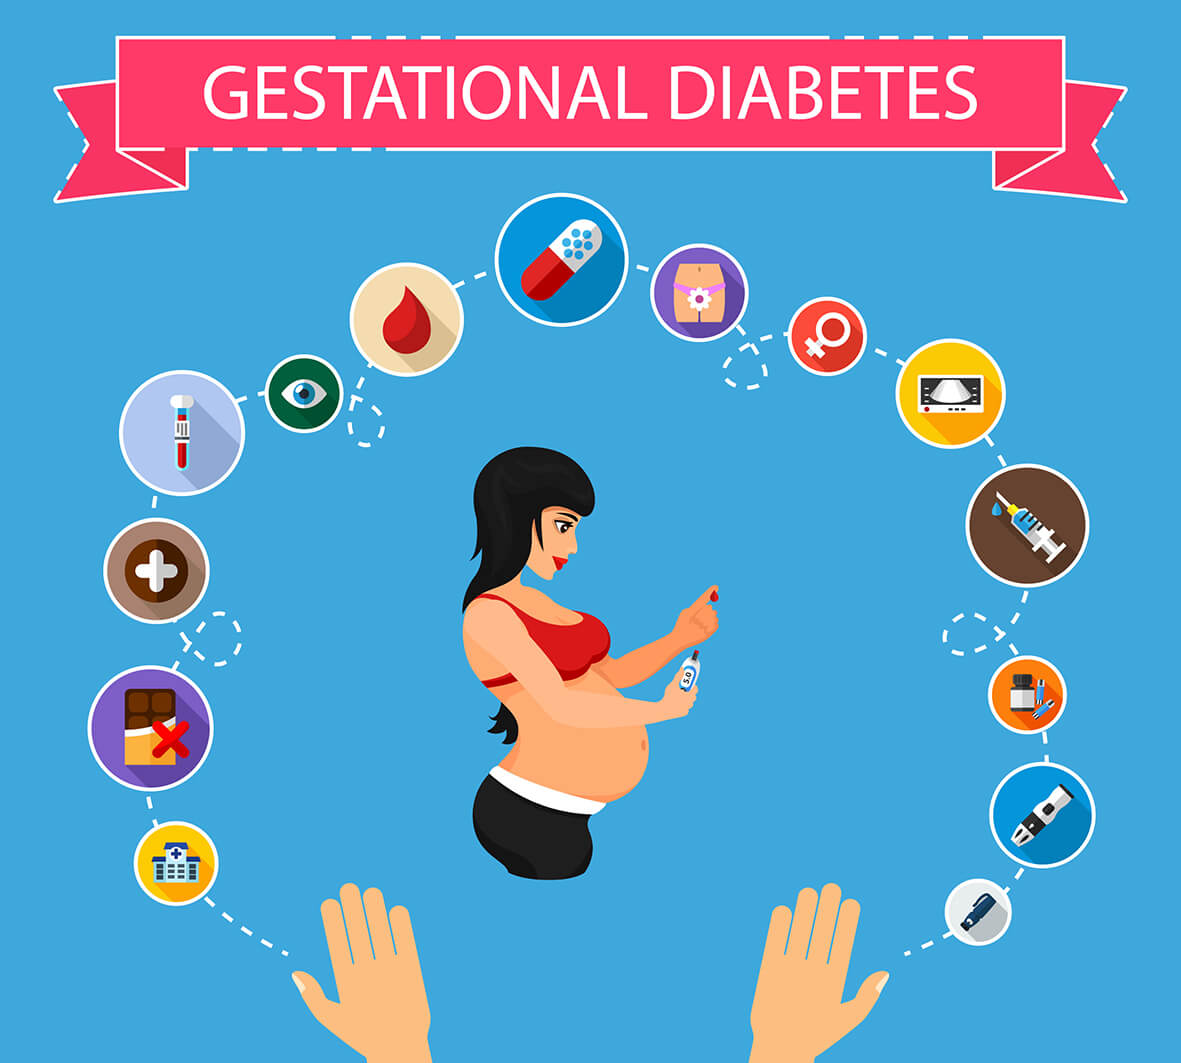

##### NOTE:
##### Since Gestational Diabetes (GDM) is the onset of elevated blood sugar levels during pregnancy. it is the leading cause for maternal deaths and increased health complications.

From the plot showing the ratio of diabetic(1) and non diabetic(0) with their pregnancies we can conclude- Women with least pregnancies are more non diabetic, so pregnancies do effect diabetes.

### Show the BMI distribution for particular age group as per the outcome rate of diabetes.

<AxesSubplot:xlabel='BMI', ylabel='Age'>

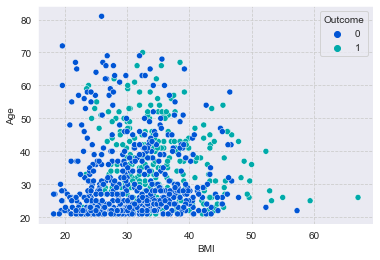

In [75]:
sns.scatterplot(x='BMI',y='Age',hue='Outcome',palette='winter',data=df)

from this plot we can see a trend that the ones 
with BMI above approximately above 32 and age range 30 to 60 are having diabetes.

### # In which age group people should be more cautious as they can be  more prone to diabetes?

In [76]:
df['Age']

0      50
2      32
4      33
6      26
8      53
       ..
762    33
763    63
764    27
765    30
767    23
Name: Age, Length: 768, dtype: int64

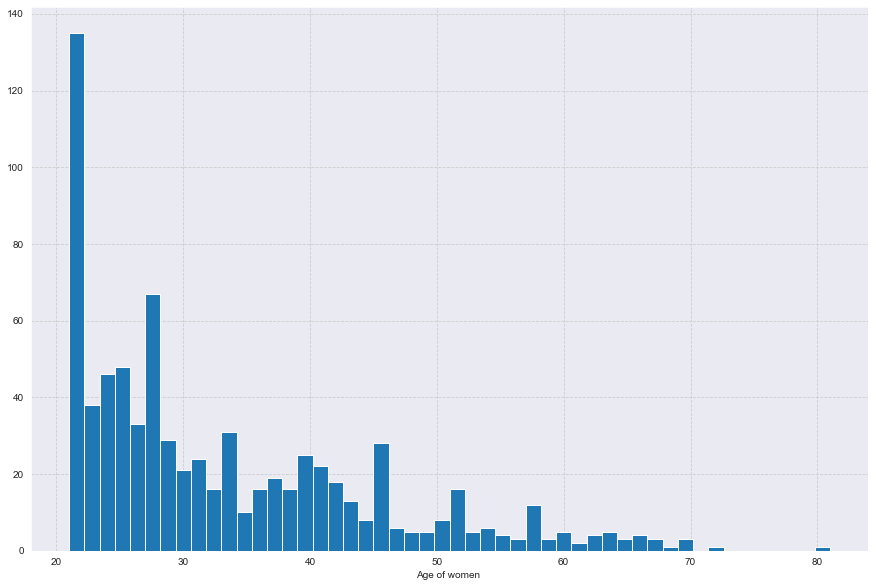

In [77]:
plt.figure(figsize=(15,10))
plt.hist(df['Age'], bins=50)
plt.xlabel("Age of women ")
plt.show()

# countplot for age hue as outcome

<AxesSubplot:xlabel='Age', ylabel='count'>

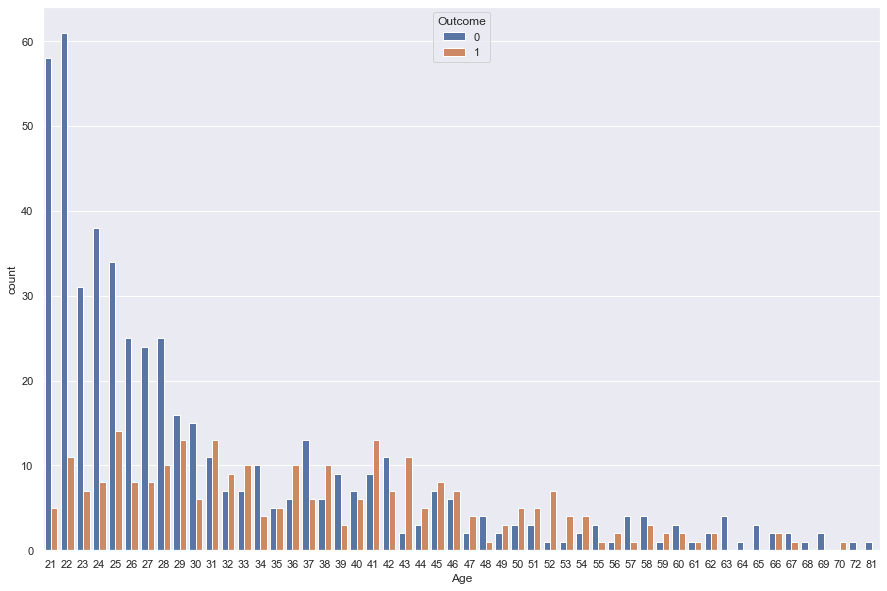

In [78]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x="Age",hue='Outcome',data=df)

In [79]:
y=df.loc[df['Outcome'] == 1].mean()
y['Age']


37.06716417910448

In [80]:
y=df.loc[df['Outcome'] == 0].mean()
y['Age']

31.19

 People of age group (37 and more ) are more prone to be diabetic.Because blood may have a higher risk of increased blood glucose levels.

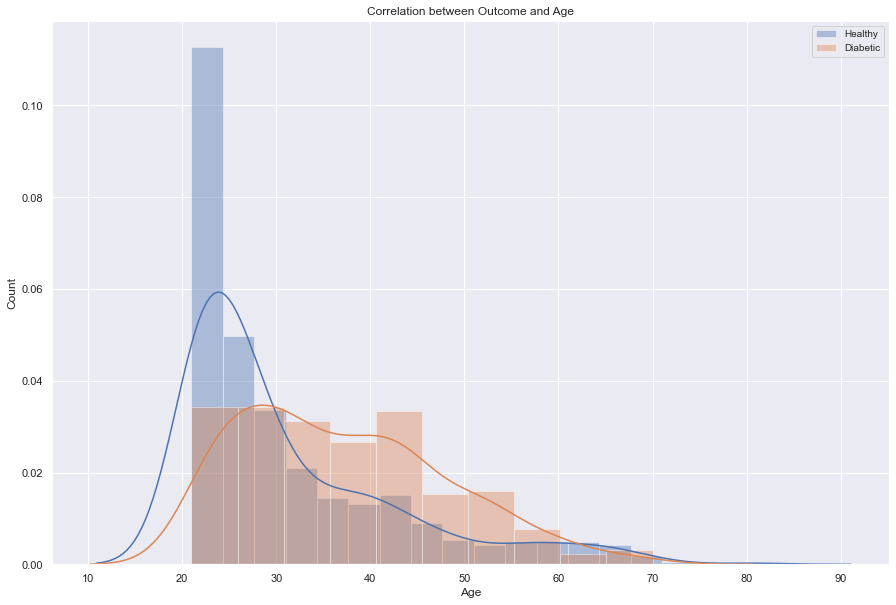

In [81]:
# Checking Correlation between Outcome and Age

sns.distplot(df.loc[df['Outcome']==0, 'Age'],label='Healthy')
sns.distplot(df.loc[df['Outcome']==1, 'Age'], label='Diabetic')
plt.legend(prop={'size': 10})
plt.title('Correlation between Outcome and Age')
plt.xlabel('Age')
plt.ylabel('Count') 
sns.set(rc={'figure.figsize':(6,4)}) 

# does diabetic have higher bmi ?


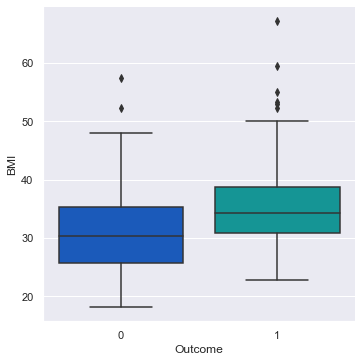

In [82]:
sns.catplot(x='Outcome',y='BMI',palette='winter',data=df,kind='box')

Diabetic people seems to be on higher side of BMI.

### # Are more people  Diabetic or Non Diabetic ?

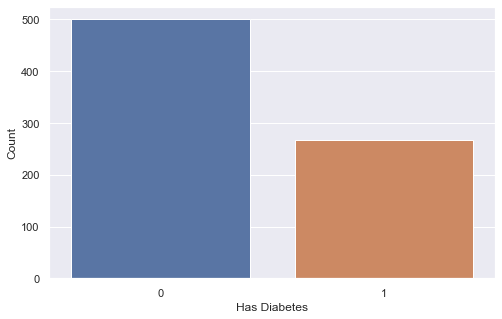

In [83]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(8,5))
sns.countplot(x='Outcome', data=df)

# Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

OBSERVATION : More people are non diabetic.

### # Check the percentage of healthy and diabetic women? 

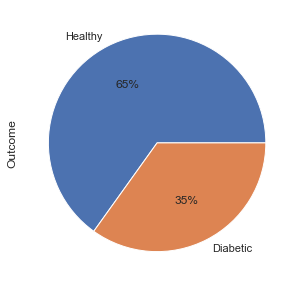

In [84]:

labels = ["Healthy", "Diabetic"]
df['Outcome'].value_counts().plot(kind='pie',labels=labels,autopct='%1.0f%%', figsize=(5,5)); 

OBSERVATION:

We see that the data has more percentage of women who are healthy and fit.

# Feature Engineering

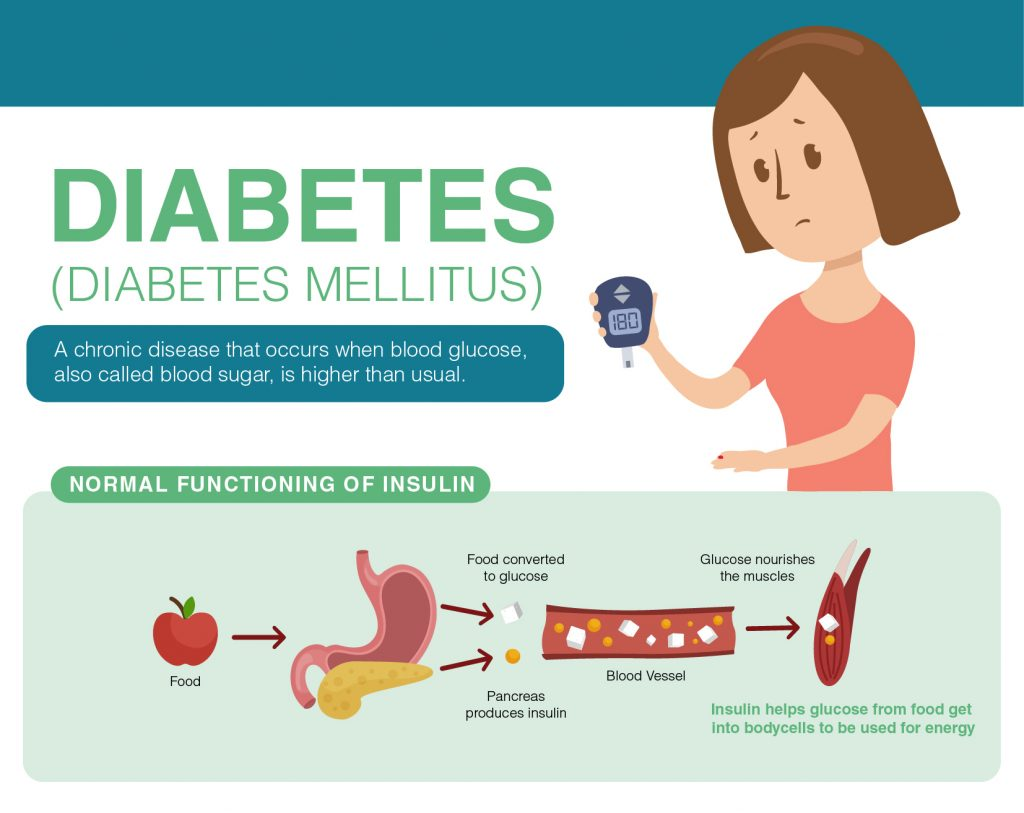

Glucose : The results can be classified as normal, impaired, or abnormal

Normal Results for Diabetes -> Two-hour glucose level less than 140 mg/dL 

Impaired Results for Diabetes -> Two-hour glucose level 140 to 200 mg/dL 

Abnormal (Diagnostic) Results for Diabetes -> Two-hour glucose level greater than 200 mg/dL

Blood Pressure: This is the time when the heart fills with blood and gets oxygen.

Normal: Systolic below 120 and diastolic below 80 

Elevated: Systolic 120–129 and diastolic under 80

Hypertension stage 1: Systolic 130–139 and diastolic 80–89 

Hypertension stage 2: Systolic 140-plus and diastolic 90 or more

Hypertensive crisis: Systolic higher than 180 and diastolic above 120.

BMI:

Below 18.5 -> Underweight 

18.5 – 24.9 -> Normal or Healthy Weight 

25.0 – 29.9 -> Overweight 30.0 

and Above -> Obese

Triceps Skinfolds: For adults, the standard normal values for triceps skinfolds ; 

2.5mm (men) 

18.0mm (women)

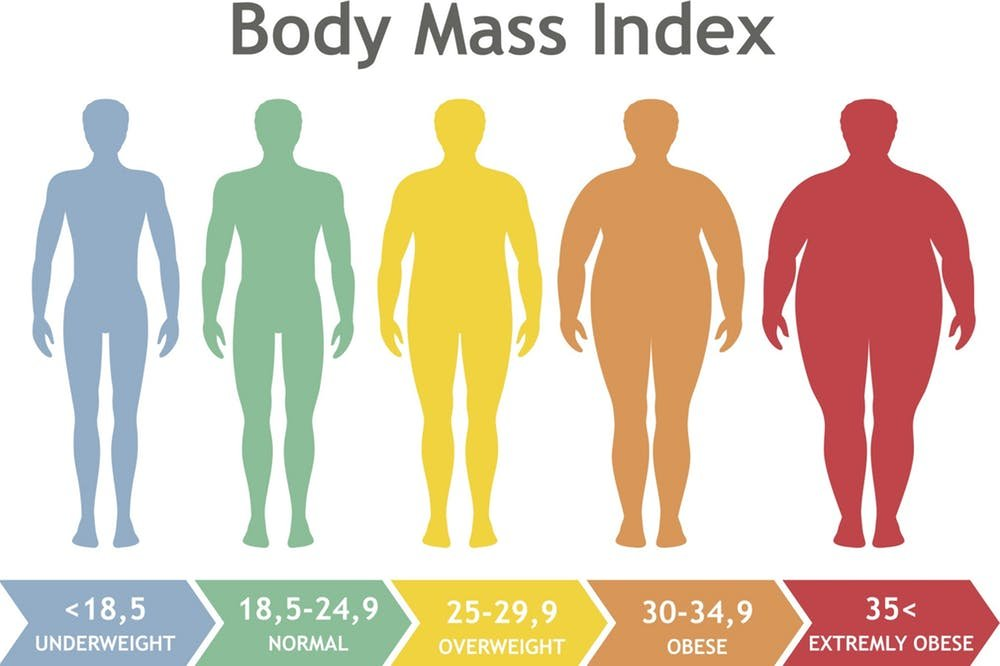

#### Let's dive to Feature Engineering. As we can see in the final, our new features almost reached the top levels of importance.

In [85]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
num_cols = [col for col in df.columns if df[col].dtypes != "O"]
if len(cat_cols) == 0:
    print("There is not Categorical Column",",","Number of Numerical Columns: ", len(num_cols), "\n", num_cols)
elif len(num_cols) == 0:
    print("There is not Numerical Column",",","Number of Categorical Column: ", len(cat_cols), "\n", cat_cols)
else:
    print("")


There is not Categorical Column , Number of Numerical Columns:  9 
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age', 'Outcome']


In [86]:
df['Glucose_Range'] = pd.cut(x=df['Glucose'], bins = [0,140,200], labels = ["Normal","Prediabetes"]).astype('O')
df['BMI_Range'] = pd.cut(x=df['BMI'], bins=[0,18.5,24.9,29.9,100],labels = ["Underweight","Healty","Overweight","Obese"])
df['BloodPressure_Range'] = pd.cut(x=df['BloodPressure'], bins=[0,79,89,123],labels = ["Normal","HS1","HS2"])
df['SkinThickness_Range'] = df['SkinThickness'].apply(lambda x: 1 if x <= 18.0 else 0)

In [87]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"
df["Insulin_range"] = df.apply(set_insulin, axis=1)

In [88]:
df["BloodPres/Glucose"] = df["BloodPressure"] / df["Glucose"]
df["Pregs*DiabetesPedigree"] = df["Pregnancies"] / df["DPF"]
df["Pregs*DiabetesPedigree"] = df["Pregnancies"] * df["DPF"]
df["BMI/Age"] = df["BMI"] / df["Age"]

In [89]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
4            0    137.0           40.0      35.000000  168.000000  43.1   
6            3     78.0           50.0      32.000000   88.000000  31.0   
8            2    197.0           70.0      45.000000  543.000000  30.5   

     DPF  Age  Outcome Glucose_Range BMI_Range BloodPressure_Range  \
0  0.627   50        1   Prediabetes     Obese              Normal   
2  0.672   32        1   Prediabetes    Healty              Normal   
4  2.288   33        1        Normal     Obese              Normal   
6  0.248   26        1        Normal     Obese              Normal   
8  0.158   53        1   Prediabetes     Obese              Normal   

   SkinThickness_Range Insulin_range  BloodPres/Glucose  \
0                    0        Normal           0.486486   
2                    0        Normal           0.349727   
4                    0      Abnormal           0.291971   
6                    0        Normal           0.641026   
8                    0      Abnormal           0.355330   

   Pregs*DiabetesPedigree   BMI/Age  
0                   3.762  0.672000  
2                   5.376  0.728125  
4                   0.000  1.306061  
6                   0.744  1.192308  
8                   0.316  0.575472

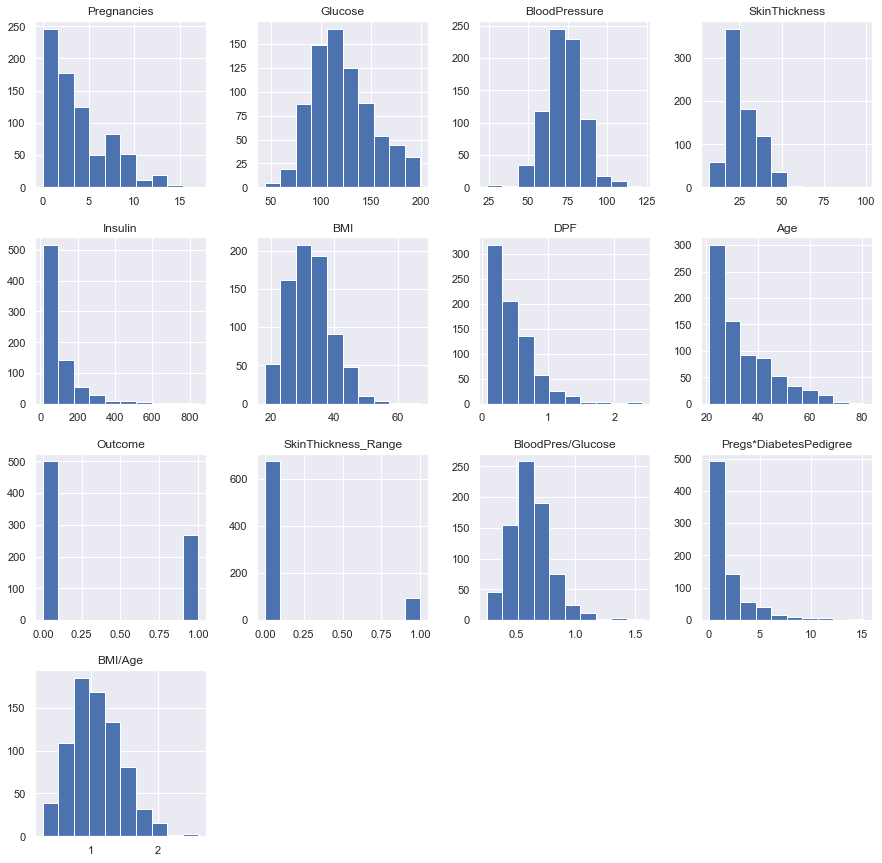

In [90]:
p = df.hist(figsize=(15,15))

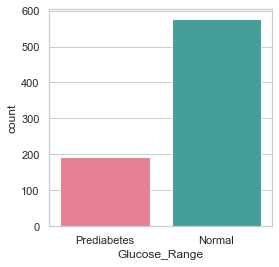

In [91]:
sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))
sns.countplot(x="Glucose_Range", data=df, palette='husl');

Now it becomes quite easy to analyze that how many women are normal and how many of them under threat of diabetes,for the same query we worked now a single added column made things quite easier ffor analysis.

<AxesSubplot:xlabel='BloodPressure_Range', ylabel='count'>

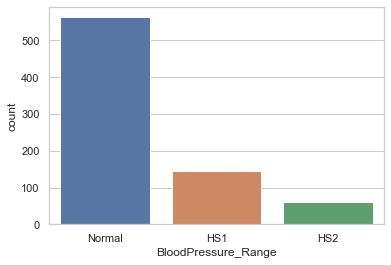

In [92]:
sns.countplot(df['BloodPressure_Range'])

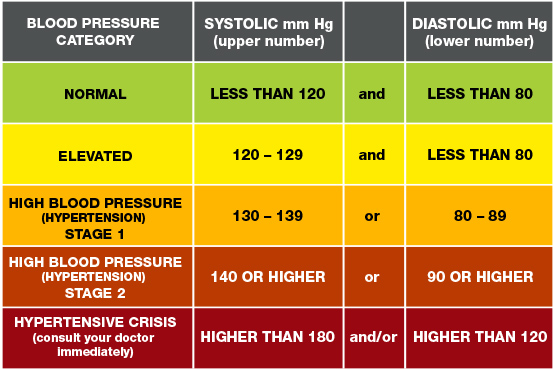

OBSERVATION:

It is clearly visibe with the help of countplot that:

 More than 500 women (the major portion) got normal blood pressure levels.
 
 Then more than 100 are in hypertension stage 1.

And around 50 women are in the second stge of hypertension.

<AxesSubplot:xlabel='Insulin_range', ylabel='count'>

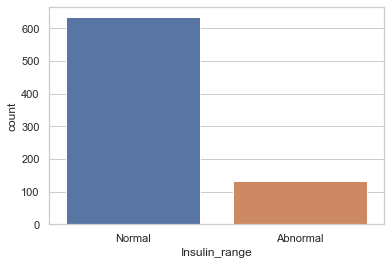

In [93]:
sns.countplot(df['Insulin_range'])

OBSERVATION:

Most of the women have normal insulin range.

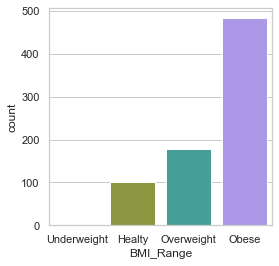

In [94]:
sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))
sns.countplot(x="BMI_Range", data=df, palette='husl');

OBSERVATION:

The figure clearly shows that most of the women are obese followed by overweight and least no of healthy women.But this doesn't imply that diabetes has strong relation with obesity, somehow it counts to be an important attribute.

0    675
1     93
Name: SkinThickness_Range, dtype: int64


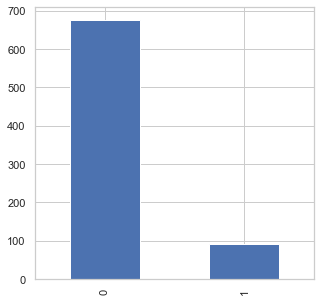

In [95]:
print(df.SkinThickness_Range.value_counts())
p=df.SkinThickness_Range.value_counts().plot(kind='bar',figsize=(5,5)) 

OBSERVATION:

Continuing the above analysis we make it clear that non diabetic women had more accumulated fat .

<AxesSubplot:>

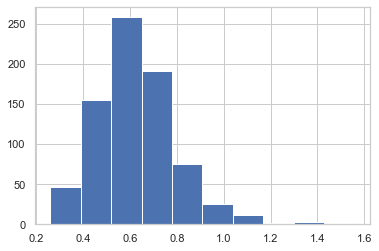

In [96]:
df['BloodPres/Glucose'].hist()

In [97]:
df.sort_values(by="Pregs*DiabetesPedigree")

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
220            0    177.0           60.0      29.000000  478.000000  34.6   
381            0    105.0           68.0      22.000000   79.799479  20.0   
308            0    128.0           68.0      19.000000  180.000000  30.5   
647            0    179.0           50.0      36.000000  159.000000  37.8   
379            0     93.0          100.0      39.000000   72.000000  43.4   
..           ...      ...            ...            ...         ...   ...   
330            8    118.0           72.0      19.000000   79.799479  23.1   
159           17    163.0           72.0      41.000000  114.000000  40.9   
12            10    139.0           80.0      20.536458   79.799479  27.1   
259           11    155.0           76.0      28.000000  150.000000  33.3   
744           13    153.0           88.0      37.000000  140.000000  40.6   

       DPF  Age  Outcome Glucose_Range   BMI_Range BloodPressure_Range  \
220  1.072   21        1   Prediabetes       Obese              Normal   
381  0.236   22        0        Normal      Healty              Normal   
308  1.391   25        1        Normal       Obese              Normal   
647  0.455   22        1   Prediabetes       Obese              Normal   
379  1.021   35        0        Normal       Obese                 HS2   
..     ...  ...      ...           ...         ...                 ...   
330  1.476   46        0        Normal      Healty              Normal   
159  0.817   47        1   Prediabetes       Obese              Normal   
12   1.441   57        0        Normal  Overweight                 HS1   
259  1.353   51        1   Prediabetes       Obese              Normal   
744  1.174   39        0   Prediabetes       Obese                 HS1   

     SkinThickness_Range Insulin_range  BloodPres/Glucose  \
220                    0      Abnormal           0.338983   
381                    0        Normal           0.647619   
308                    0      Abnormal           0.531250   
647                    0        Normal           0.279330   
379                    0        Normal           1.075269   
..                   ...           ...                ...   
330                    0        Normal           0.610169   
159                    0        Normal           0.441718   
12                     0        Normal           0.575540   
259                    0        Normal           0.490323   
744                    0        Normal           0.575163   

     Pregs*DiabetesPedigree   BMI/Age  
220                   0.000  1.647619  
381                   0.000  0.909091  
308                   0.000  1.220000  
647                   0.000  1.718182  
379                   0.000  1.240000  
..                      ...       ...  
330                  11.808  0.502174  
159                  13.889  0.870213  
12                   14.410  0.475439  
259                  14.883  0.652941  
744                  15.262  1.041026  

[768 rows x 17 columns]

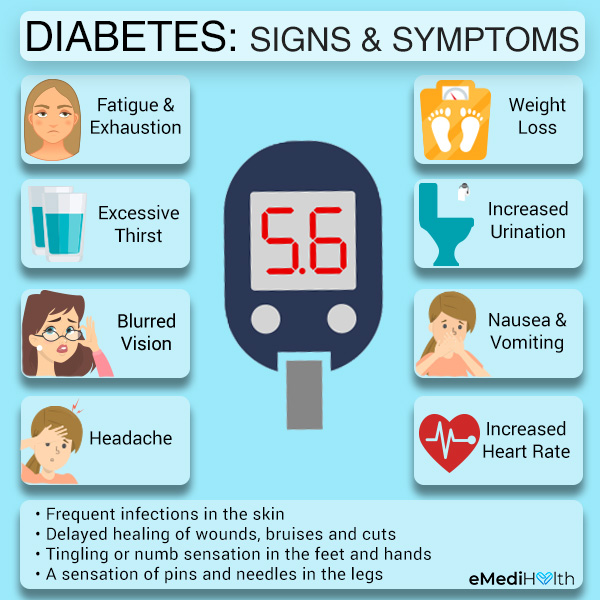

### CONCLUSION : Conclusions from Analysis

We're working with data for 768 patients
The data, pretty much like all data, consists of outliers
The dataset has more patients who don't have diabetes (65.1042% of patients don't have diabetes in this dataset)
Out of all other features, Glucose has the best correlation to Outcome
Skewed distribution
We may be dealing with missing data


In this data 65% womens are healthy whereas 35% women are diabetic .
From this data we Can infer that :
  
  1.Women after age of 30 are more prone to diabetes.
   
  2. Women after more pregnancies there are  more chances to have high glucose levels.
  
  3. With age the blood pressure increases.
  
  4. Glucose is the most important factor in determining the onset of diabetes followed by BMI and Age.
 
  5. Other factors such as Diabetes Pedigree Function, Pregnancies, Blood Pressure, Skin Thickness and Insulin also contributes     to the prediction.
 
  6. Diabetic people tend to have higher BP which leads to risk of many other diseases such as hypertension, heart          diseases,strokes etc.

7. Obese people develop more chances of higher insulin levels which in turn lead to pre diabetic or diabetic conditions.

Diabetes is one of the most common diseases of our time and a disease that we start to see frequently in every age range. Early diagnosis is really important in terms of preventing diabetes and taking precautions. So, as data scientists, I think we should pay more attention to such health problems.


##### FUTURE WORK :
1.As  for  data  selection,  the  age  and  gender  of  patients  could  be  expanded  so  that  we  can  get information about children’s diabetes and male’s diabetes

2. For future work it is necessary to make a local dataset from hospital. Food habit of every country is different from each other. So it is important to gather a local dataset.

##### REFERENCES :
 Kaggle
 
 W3resource
 
 towardsdatascience.com
 
 medium.com


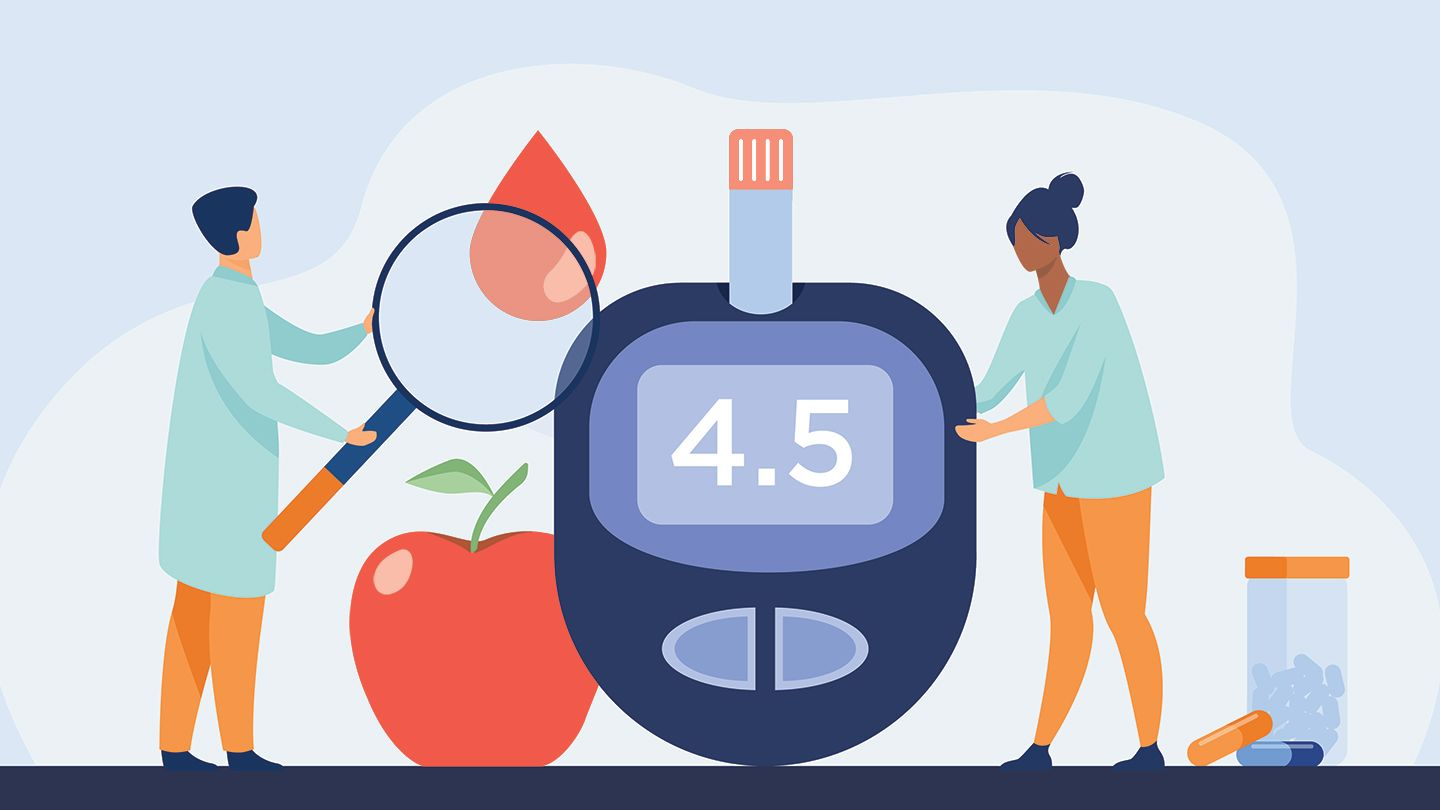

## STAY HEALTHY AND STAY SAFE 